In [68]:
# Import necessary packages, libraries, and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import random
import zipfile

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Path to the zip file
zip_file_path = 'playground-series-s4e8.zip'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # Open and read the CSV file within the zip
    with z.open('playground-series-s4e8/train.csv') as f:
        train_df = pd.read_csv(f)

In [3]:
# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # Open and read the CSV file within the zip
    with z.open('playground-series-s4e8/test.csv') as f:
        test_df = pd.read_csv(f)

In [4]:
train_df

id class  cap-diameter cap-shape cap-surface cap-color  \
0              0     e          8.80         f           s         u   
1              1     p          4.51         x           h         o   
2              2     e          6.94         f           s         b   
3              3     e          3.88         f           y         g   
4              4     e          5.85         x           l         w   
...          ...   ...           ...       ...         ...       ...   
3116940  3116940     e          9.29         f         NaN         n   
3116941  3116941     e         10.88         s         NaN         w   
3116942  3116942     p          7.82         x           e         e   
3116943  3116943     e          9.45         p           i         n   
3116944  3116944     p          3.20         x           s         g   

        does-bruise-or-bleed gill-attachment gill-spacing gill-color  ...  \
0                          f               a            c          w  ...   
1                          f               a            c          n  ...   
2                          f               x            c          w  ...   
3                          f               s          NaN          g  ...   
4                          f               d          NaN          w  ...   
...                      ...             ...          ...        ...  ...   
3116940                    t             NaN          NaN          w  ...   
3116941                    t               d            c          p  ...   
3116942                    f               a          NaN          w  ...   
3116943                    t               e          NaN          p  ...   
3116944                    f               d            c          w  ...   

         stem-root  stem-surface stem-color veil-type veil-color has-ring  \
0              NaN           NaN          w       NaN        NaN        f   
1              NaN             y          o       NaN        NaN        t   
2              NaN             s          n       NaN        NaN        f   
3              NaN           NaN          w       NaN        NaN        f   
4              NaN           NaN          w       NaN        NaN        f   
...            ...           ...        ...       ...        ...      ...   
3116940          b           NaN          w         u          w        t   
3116941        NaN           NaN          w       NaN        NaN        f   
3116942        NaN           NaN          y       NaN          w        t   
3116943        NaN             y          w       NaN        NaN        t   
3116944        NaN           NaN          w       NaN        NaN        f   

        ring-type spore-print-color habitat season  
0               f               NaN       d      a  
1               z               NaN       d      w  
2               f               NaN       l      w  
3               f               NaN       d      u  
4               f               NaN       g      a  
...           ...               ...     ...    ...  
3116940         g               NaN       d      u  
3116941         f               NaN       d      u  
3116942         z               NaN       d      a  
3116943         p               NaN       d      u  
3116944         f               NaN       g      u  

[3116945 rows x 22 columns]

In [5]:
test_df

id  cap-diameter cap-shape cap-surface cap-color  \
0        3116945          8.64         x         NaN         n   
1        3116946          6.90         o           t         o   
2        3116947          2.00         b           g         n   
3        3116948          3.47         x           t         n   
4        3116949          6.17         x           h         y   
...          ...           ...       ...         ...       ...   
2077959  5194904          0.88         x           g         w   
2077960  5194905          3.12         x           s         w   
2077961  5194906          5.73         x           e         e   
2077962  5194907          5.03         b           g         n   
2077963  5194908         15.51         f         NaN         w   

        does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                          t             NaN          NaN          w   
1                          f             NaN            c          y   
2                          f             NaN            c          n   
3                          f               s            c          n   
4                          f               p          NaN          y   
...                      ...             ...          ...        ...   
2077959                    f               a            d          w   
2077960                    f               d            c          w   
2077961                    f               a          NaN          w   
2077962                    f               a            d          g   
2077963                    f               d            c          y   

         stem-height  ...  stem-root stem-surface stem-color veil-type  \
0              11.13  ...          b          NaN          w         u   
1               1.27  ...        NaN          NaN          n       NaN   
2               6.18  ...        NaN          NaN          n       NaN   
3               4.98  ...        NaN          NaN          w       NaN   
4               6.73  ...        NaN          NaN          y       NaN   
...              ...  ...        ...          ...        ...       ...   
2077959         2.67  ...        NaN          NaN          e       NaN   
2077960         2.69  ...        NaN          NaN          w       NaN   
2077961         6.16  ...        NaN          NaN          y       NaN   
2077962         6.00  ...        NaN            s          g       NaN   
2077963         2.69  ...        NaN          NaN          w       NaN   

        veil-color has-ring ring-type spore-print-color habitat season  
0                w        t         g               NaN       d      a  
1              NaN        f         f               NaN       d      a  
2              NaN        f         f               NaN       d      s  
3                n        t         z               NaN       d      u  
4                y        t       NaN               NaN       d      u  
...            ...      ...       ...               ...     ...    ...  
2077959        NaN        f         f               NaN       d      u  
2077960        NaN        f         f               NaN       g      a  
2077961          w        t         z               NaN       d      a  
2077962        NaN        f         f               NaN       d      a  
2077963        NaN        f         f               NaN       d      w  

[2077964 rows x 21 columns]

In [6]:
# To check for missing values for all columns in Train_df
train_df.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [7]:
test_df.isnull().sum() 

id                            0
cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64

In [8]:
# Drop the following 2 columns id and class, id because it's an identifier which is irrelevant, and class because it's the target variable
preprocessed_train_df = train_df.drop(columns=['id', 'class'])
preprocessed_train_df

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0                8.80         f           s         u                    f   
1                4.51         x           h         o                    f   
2                6.94         f           s         b                    f   
3                3.88         f           y         g                    f   
4                5.85         x           l         w                    f   
...               ...       ...         ...       ...                  ...   
3116940          9.29         f         NaN         n                    t   
3116941         10.88         s         NaN         w                    t   
3116942          7.82         x           e         e                    f   
3116943          9.45         p           i         n                    t   
3116944          3.20         x           s         g                    f   

        gill-attachment gill-spacing gill-color  stem-height  stem-width  \
0                     a            c          w         4.51       15.39   
1                     a            c          n         4.79        6.48   
2                     x            c          w         6.85        9.93   
3                     s          NaN          g         4.16        6.53   
4                     d          NaN          w         3.37        8.36   
...                 ...          ...        ...          ...         ...   
3116940             NaN          NaN          w        12.14       18.81   
3116941               d            c          p         6.65       26.97   
3116942               a          NaN          w         9.51       11.06   
3116943               e          NaN          p         9.13       17.77   
3116944               d            c          w         2.82        7.79   

        stem-root stem-surface stem-color veil-type veil-color has-ring  \
0             NaN          NaN          w       NaN        NaN        f   
1             NaN            y          o       NaN        NaN        t   
2             NaN            s          n       NaN        NaN        f   
3             NaN          NaN          w       NaN        NaN        f   
4             NaN          NaN          w       NaN        NaN        f   
...           ...          ...        ...       ...        ...      ...   
3116940         b          NaN          w         u          w        t   
3116941       NaN          NaN          w       NaN        NaN        f   
3116942       NaN          NaN          y       NaN          w        t   
3116943       NaN            y          w       NaN        NaN        t   
3116944       NaN          NaN          w       NaN        NaN        f   

        ring-type spore-print-color habitat season  
0               f               NaN       d      a  
1               z               NaN       d      w  
2               f               NaN       l      w  
3               f               NaN       d      u  
4               f               NaN       g      a  
...           ...               ...     ...    ...  
3116940         g               NaN       d      u  
3116941         f               NaN       d      u  
3116942         z               NaN       d      a  
3116943         p               NaN       d      u  
3116944         f               NaN       g      u  

[3116945 rows x 20 columns]

In [9]:
# Drop the following column id, id because it's an identifier which is irrelevant
preprocessed_test_df = test_df.drop(columns=['id'])
preprocessed_test_df

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0                8.64         x         NaN         n                    t   
1                6.90         o           t         o                    f   
2                2.00         b           g         n                    f   
3                3.47         x           t         n                    f   
4                6.17         x           h         y                    f   
...               ...       ...         ...       ...                  ...   
2077959          0.88         x           g         w                    f   
2077960          3.12         x           s         w                    f   
2077961          5.73         x           e         e                    f   
2077962          5.03         b           g         n                    f   
2077963         15.51         f         NaN         w                    f   

        gill-attachment gill-spacing gill-color  stem-height  stem-width  \
0                   NaN          NaN          w        11.13       17.12   
1                   NaN            c          y         1.27       10.75   
2                   NaN            c          n         6.18        3.14   
3                     s            c          n         4.98        8.51   
4                     p          NaN          y         6.73       13.70   
...                 ...          ...        ...          ...         ...   
2077959               a            d          w         2.67        1.35   
2077960               d            c          w         2.69        7.38   
2077961               a          NaN          w         6.16        9.74   
2077962               a            d          g         6.00        3.46   
2077963               d            c          y         2.69       17.71   

        stem-root stem-surface stem-color veil-type veil-color has-ring  \
0               b          NaN          w         u          w        t   
1             NaN          NaN          n       NaN        NaN        f   
2             NaN          NaN          n       NaN        NaN        f   
3             NaN          NaN          w       NaN          n        t   
4             NaN          NaN          y       NaN          y        t   
...           ...          ...        ...       ...        ...      ...   
2077959       NaN          NaN          e       NaN        NaN        f   
2077960       NaN          NaN          w       NaN        NaN        f   
2077961       NaN          NaN          y       NaN          w        t   
2077962       NaN            s          g       NaN        NaN        f   
2077963       NaN          NaN          w       NaN        NaN        f   

        ring-type spore-print-color habitat season  
0               g               NaN       d      a  
1               f               NaN       d      a  
2               f               NaN       d      s  
3               z               NaN       d      u  
4             NaN               NaN       d      u  
...           ...               ...     ...    ...  
2077959         f               NaN       d      u  
2077960         f               NaN       g      a  
2077961         z               NaN       d      a  
2077962         f               NaN       d      a  
2077963         f               NaN       d      w  

[2077964 rows x 20 columns]

In [10]:
# Calculate the missing values for each column as a percentage of total rows in train_df
columns = preprocessed_train_df.columns
for column in columns: 
    column_name = column
    missing_values_percentage = (preprocessed_train_df[column].isnull().sum() / preprocessed_train_df.shape[0])
    print(f"Missing values percentage for {column_name.capitalize()} : {missing_values_percentage:.3%}")

Missing values percentage for Cap-diameter : 0.000%
Missing values percentage for Cap-shape : 0.001%
Missing values percentage for Cap-surface : 21.528%
Missing values percentage for Cap-color : 0.000%
Missing values percentage for Does-bruise-or-bleed : 0.000%
Missing values percentage for Gill-attachment : 16.809%
Missing values percentage for Gill-spacing : 40.374%
Missing values percentage for Gill-color : 0.002%
Missing values percentage for Stem-height : 0.000%
Missing values percentage for Stem-width : 0.000%
Missing values percentage for Stem-root : 88.453%
Missing values percentage for Stem-surface : 63.551%
Missing values percentage for Stem-color : 0.001%
Missing values percentage for Veil-type : 94.884%
Missing values percentage for Veil-color : 87.937%
Missing values percentage for Has-ring : 0.001%
Missing values percentage for Ring-type : 4.135%
Missing values percentage for Spore-print-color : 91.425%
Missing values percentage for Habitat : 0.001%
Missing values percent

In [11]:
# Calculate the missing values for each column as a percentage of total rows in test_df
test_columns = preprocessed_test_df.columns
for column in test_columns: 
    column_name = column 
    missing_values_percentage = (preprocessed_test_df[column].isnull().sum() / preprocessed_test_df.shape[0])
    print(f"Missing values percentage for {column_name.capitalize()} : {missing_values_percentage:.3%}")

Missing values percentage for Cap-diameter : 0.000%
Missing values percentage for Cap-shape : 0.001%
Missing values percentage for Cap-surface : 21.507%
Missing values percentage for Cap-color : 0.001%
Missing values percentage for Does-bruise-or-bleed : 0.000%
Missing values percentage for Gill-attachment : 16.835%
Missing values percentage for Gill-spacing : 40.405%
Missing values percentage for Gill-color : 0.002%
Missing values percentage for Stem-height : 0.000%
Missing values percentage for Stem-width : 0.000%
Missing values percentage for Stem-root : 88.453%
Missing values percentage for Stem-surface : 63.595%
Missing values percentage for Stem-color : 0.001%
Missing values percentage for Veil-type : 94.879%
Missing values percentage for Veil-color : 87.880%
Missing values percentage for Has-ring : 0.001%
Missing values percentage for Ring-type : 4.148%
Missing values percentage for Spore-print-color : 91.417%
Missing values percentage for Habitat : 0.001%
Missing values percent

In [12]:
# Initialise display_value_counts function
def display_value_counts(column, df): 
    column_value_counts  = df[column].value_counts()
    return column_value_counts

In [13]:
# Find the unique values and frequency of occurrences for columns with object dtype in train_df
object_columns = [column for column in columns if preprocessed_train_df[column].dtypes == 'object']
# print (len(object_columns))

# Find how many unique values there are for each feature in train_df
for column in object_columns: 
    print (f"{column.capitalize()} has {preprocessed_train_df[column].nunique()} unique values") 
    # print (f"{column.capitalize()} has {preprocessed_train_df[column].unique()} unique values") 

Cap-shape has 74 unique values
Cap-surface has 83 unique values
Cap-color has 78 unique values
Does-bruise-or-bleed has 26 unique values
Gill-attachment has 78 unique values
Gill-spacing has 48 unique values
Gill-color has 63 unique values
Stem-root has 38 unique values
Stem-surface has 60 unique values
Stem-color has 59 unique values
Veil-type has 22 unique values
Veil-color has 24 unique values
Has-ring has 23 unique values
Ring-type has 40 unique values
Spore-print-color has 32 unique values
Habitat has 52 unique values
Season has 4 unique values


In [14]:
# Find the unique values and frequency of occurrences for columns with object dtype in test_df
test_object_columns = [column for column in columns if preprocessed_test_df[column].dtypes == 'object']

# Find how many unique values there are for each feature in test_df
for column in test_object_columns: 
    print (f"{column.capitalize()} has {preprocessed_test_df[column].nunique()} unique values") 

Cap-shape has 62 unique values
Cap-surface has 59 unique values
Cap-color has 57 unique values
Does-bruise-or-bleed has 22 unique values
Gill-attachment has 66 unique values
Gill-spacing has 35 unique values
Gill-color has 56 unique values
Stem-root has 31 unique values
Stem-surface has 54 unique values
Stem-color has 55 unique values
Veil-type has 15 unique values
Veil-color has 23 unique values
Has-ring has 23 unique values
Ring-type has 36 unique values
Spore-print-color has 33 unique values
Habitat has 39 unique values
Season has 4 unique values


In [15]:
for column in test_object_columns: 
    print (f"---- {column} ----")
    display(display_value_counts(column, preprocessed_test_df).to_frame())
    pd.set_option('display.max_rows', False)

---- cap-shape ----


count
cap-shape        
x          957949
f          452360
s          242698
b          211879
o           71972
...           ...
5.59            1
4.41            1
3.73            1
3.47            1
4.54            1

[62 rows x 1 columns]

---- cap-surface ----


count
cap-surface        
t            306852
s            257190
y            218336
h            189737
g            176140
d            137675
k             86041
e             79918
i             75570
...             ...
11.96             1
8.34              1
7.96              1
9.53              1
17.98             1
habitat           1
2.47              1
20.64             1
5.1               1

[59 rows x 1 columns]

---- cap-color ----


count
cap-color        
n          904307
y          259062
w          253844
g          140681
e          131524
o          119764
p           61186
r           51784
u           48865
...           ...
habitat         1
18.49           1
7.41            1
5.38            1
5.35            1
19.18           1
0.73            1
10.93           1
9.19            1

[57 rows x 1 columns]

---- does-bruise-or-bleed ----


count
does-bruise-or-bleed         
f                     1713662
t                      364227
x                          11
s                           7
w                           7
p                           5
n                           4
h                           4
k                           3
...                       ...
a                           2
b                           2
m                           2
does t                      1
season                      1
i                           1
r                           1
l                           1
y                           1

[22 rows x 1 columns]

---- gill-attachment ----


count
gill-attachment        
a                430960
d                392584
x                240758
e                201276
s                196279
p                186334
f                 79630
c                    53
u                    35
...                 ...
1.32                  1
12.22                 1
6.35                  1
17.77                 1
1.26                  1
7.18                  1
8.21                  1
2.51                  1
is None               1

[66 rows x 1 columns]

---- gill-spacing ----


count
gill-spacing        
c             886976
d             272085
f              79223
e                 11
s                 10
a                 10
b                  7
x                  6
p                  5
...              ...
does c             1
k                  1
i                  1
3.42               1
1.46               1
r                  1
1.61               1
has f              1
18.89              1

[35 rows x 1 columns]

---- gill-color ----


count
gill-color        
w           620773
n           362169
y           313932
p           229155
g           141519
o           105048
k            85360
f            79482
r            41499
...            ...
17.26            1
is w             1
12.87            1
10.56            1
5.01             1
19.46            1
1.55             1
6.3              1
2.83             1

[56 rows x 1 columns]

---- stem-root ----


count
stem-root        
b          110581
s           78253
r           31606
c           19025
f             374
y              14
g              14
p              11
u               8
...           ...
18.29           1
m               1
h               1
n               1
3.24            1
13.46           1
2.82            1
3.59            1
24.73           1

[31 rows x 1 columns]

---- stem-surface ----


count
stem-surface        
s             218496
y             169462
i             149192
t              98982
g              51848
k              49075
h              18861
f                310
d                 41
...              ...
cap-diameter       1
9.98               1
2.98               1
32.63              1
32.6               1
class              1
6.06               1
6.18               1
6.59               1

[54 rows x 1 columns]

---- stem-color ----


count
stem-color        
w           797365
n           668156
y           250141
g            88202
o            75094
e            68804
u            44784
p            36356
k            22176
...            ...
season           1
17.16            1
6.58             1
8.04             1
7.35             1
veil-color       1
stem-root        1
3.05             1
3.02             1

[55 rows x 1 columns]

---- veil-type ----


count
veil-type        
u          106373
w              12
e               6
k               5
y               3
p               3
g               3
s               3
n               3
a               2
c               2
l               1
b               1
11              1
m               1

---- veil-color ----


count
veil-color        
w           186432
y            20782
n            20256
u             9413
k             8706
e             6147
g               20
p               18
t                9
...            ...
b                4
f                4
i                4
a                4
l                2
4.02             1
m                1
9                1
c                1

[23 rows x 1 columns]

---- has-ring ----


count
has-ring         
f         1578092
t          499759
e              14
r              11
c               9
g               9
h               8
d               5
l               5
...           ...
y               2
m               2
o               2
i               2
b               2
k               1
u               1
w               1
20.96           1

[23 rows x 1 columns]

---- ring-type ----


count
ring-type         
f          1650200
e            80348
z            75917
l            48847
p            45654
r            45400
g            42472
m             2689
t               46
...            ...
18.5             1
does f           1
3.48             1
10.36            1
12.63            1
is p             1
1                1
season           1
2                1

[36 rows x 1 columns]

---- spore-print-color ----


count
spore-print-color       
k                  71573
p                  45452
w                  33657
n                  15081
r                   5305
u                   4845
g                   2323
y                     18
f                     11
...                  ...
6.14                   1
veil-color             1
27.48                  1
ring-type              1
x                      1
26.48                  1
3.65                   1
4                      1
2.92                   1

[33 rows x 1 columns]

---- habitat ----


count
habitat         
d        1450420
g         304300
l         114458
m         101258
h          80032
w          12324
p          11429
u           3434
s             39
...          ...
5.83           1
5.92           1
2.02           1
5.84           1
9.01           1
2.53           1
19.85          1
4.76           1
3.19           1

[39 rows x 1 columns]

---- season ----


count
season         
a       1029085
u        768267
w        185975
s         94637

Data Preprocessing for Features which are of Object Data Type within Train DataFrame

In [16]:
# Filter the dataframe that contains wrong values within 'Does-bruise-or-bleed' column in Train_df
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['does-bruise-or-bleed'] != 'f') & (preprocessed_train_df['does-bruise-or-bleed'] != 't'))]

# Replace Categorical Feature 'does-bruise-or-bleed' with binary True or False values because this is a boolean
true_percentage = round(preprocessed_train_df[preprocessed_train_df['does-bruise-or-bleed'] == 't'].shape[0] / preprocessed_train_df[(preprocessed_train_df['does-bruise-or-bleed'] == 'f') | (preprocessed_train_df['does-bruise-or-bleed'] == 't')].shape[0] * 100, 3)

# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['t', 'f'], size=erroneous_values_df.shape[0], p=[true_percentage/100, 1 - true_percentage/100])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'does-bruise-or-bleed'] = random_choices

# Updated Value_Counts() to reflect binary true/false
preprocessed_train_df['does-bruise-or-bleed'].value_counts()


does-bruise-or-bleed
f    2569841
t     547104
Name: count, dtype: int64

In [17]:
# Filter the dataframe that contains insignificant values within 'cap-surface' column in Train_df
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['cap-surface'] != 't') & (preprocessed_train_df['cap-surface'] != 's') & (preprocessed_train_df['cap-surface'] != 'y') & (preprocessed_train_df['cap-surface'] != 'h') & (preprocessed_train_df['cap-surface'] != 'g') & (preprocessed_train_df['cap-surface'] != 'd') &(preprocessed_train_df['cap-surface'] != 'k') & (preprocessed_train_df['cap-surface'] != 'e') & (preprocessed_train_df['cap-surface'] != 'i') & (preprocessed_train_df['cap-surface'] != 'w') & (preprocessed_train_df['cap-surface'] != 'l'))]
percentage_t = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 't'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3) 
percentage_s = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 's'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3)
percentage_y = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'y'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3) 
percentage_h = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'h'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3) 
percentage_g = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'g'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3) 
percentage_d = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'd'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3)
percentage_k = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'k'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3)  
percentage_e = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'e'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3)
percentage_i = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'i'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3)  
percentage_w = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'w'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3) 
percentage_l = round(preprocessed_train_df[preprocessed_train_df['cap-surface'] == 'l'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-surface'] == 't') | (preprocessed_train_df['cap-surface'] == 's') | (preprocessed_train_df['cap-surface'] == 'y') | (preprocessed_train_df['cap-surface'] == 'h') | (preprocessed_train_df['cap-surface'] == 'g') | (preprocessed_train_df['cap-surface'] == 'd') | (preprocessed_train_df['cap-surface'] == 'k') | (preprocessed_train_df['cap-surface'] == 'e') | (preprocessed_train_df['cap-surface'] == 'i') | (preprocessed_train_df['cap-surface'] == 'w') | (preprocessed_train_df['cap-surface'] == 'l')].shape[0] * 100, 3)

# print (percentage_t, percentage_s, percentage_y, percentage_h, percentage_g, percentage_d, percentage_k, percentage_e, percentage_i, percentage_w, percentage_l) 
# print (percentage_t + percentage_s + percentage_y + percentage_h + percentage_g + percentage_d + percentage_k + percentage_e + percentage_i + percentage_w + percentage_l)

# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['t', 's', 'y', 'h', 'g', 'd', 'k', 'e', 'i', 'w', 'l'], size=erroneous_values_df.shape[0], p=[percentage_t/100, percentage_s/100, percentage_y/100, percentage_h/100, 
                            percentage_g/100, percentage_d/100, percentage_k/100, percentage_e/100, percentage_i/100, percentage_w/100, (1-(percentage_t/100+percentage_s/100+percentage_y/100+percentage_h/100+ 
                            percentage_g/100+percentage_d/100+percentage_k/100+percentage_e/100+percentage_i/100+percentage_w/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'cap-surface'] = random_choices

# Updated Value_Counts() to reflect downsizing of values within cap-surface feature
preprocessed_train_df['cap-surface'].value_counts()

cap-surface
t    587488
s    490787
y    417750
h    362649
g    336390
d    263459
k    164011
e    152528
i    144454
w    139901
l     57528
Name: count, dtype: int64

In [18]:
# Filter the dataframe that contains wrong values within 'cap-shape' column in Train_df
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['cap-shape'] != 'x') & (preprocessed_train_df['cap-shape'] != 'f') & (preprocessed_train_df['cap-shape'] != 's') & (preprocessed_train_df['cap-shape'] != 'b') & (preprocessed_train_df['cap-shape'] != 'o') & (preprocessed_train_df['cap-shape'] != 'p') & (preprocessed_train_df['cap-shape'] != 'c'))]

percentage_x = round(preprocessed_train_df[preprocessed_train_df['cap-shape'] == 'x'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-shape'] == 'x') | (preprocessed_train_df['cap-shape'] == 'f') | (preprocessed_train_df['cap-shape'] == 's') | (preprocessed_train_df['cap-shape'] == 'b') | (preprocessed_train_df['cap-shape'] == 'o') | (preprocessed_train_df['cap-shape'] == 'p') | (preprocessed_train_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_f = round(preprocessed_train_df[preprocessed_train_df['cap-shape'] == 'f'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-shape'] == 'x') | (preprocessed_train_df['cap-shape'] == 'f') | (preprocessed_train_df['cap-shape'] == 's') | (preprocessed_train_df['cap-shape'] == 'b') | (preprocessed_train_df['cap-shape'] == 'o') | (preprocessed_train_df['cap-shape'] == 'p') | (preprocessed_train_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_s = round(preprocessed_train_df[preprocessed_train_df['cap-shape'] == 's'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-shape'] == 'x') | (preprocessed_train_df['cap-shape'] == 'f') | (preprocessed_train_df['cap-shape'] == 's') | (preprocessed_train_df['cap-shape'] == 'b') | (preprocessed_train_df['cap-shape'] == 'o') | (preprocessed_train_df['cap-shape'] == 'p') | (preprocessed_train_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_b = round(preprocessed_train_df[preprocessed_train_df['cap-shape'] == 'b'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-shape'] == 'x') | (preprocessed_train_df['cap-shape'] == 'f') | (preprocessed_train_df['cap-shape'] == 's') | (preprocessed_train_df['cap-shape'] == 'b') | (preprocessed_train_df['cap-shape'] == 'o') | (preprocessed_train_df['cap-shape'] == 'p') | (preprocessed_train_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_o = round(preprocessed_train_df[preprocessed_train_df['cap-shape'] == 'o'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-shape'] == 'x') | (preprocessed_train_df['cap-shape'] == 'f') | (preprocessed_train_df['cap-shape'] == 's') | (preprocessed_train_df['cap-shape'] == 'b') | (preprocessed_train_df['cap-shape'] == 'o') | (preprocessed_train_df['cap-shape'] == 'p') | (preprocessed_train_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_p = round(preprocessed_train_df[preprocessed_train_df['cap-shape'] == 'p'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-shape'] == 'x') | (preprocessed_train_df['cap-shape'] == 'f') | (preprocessed_train_df['cap-shape'] == 's') | (preprocessed_train_df['cap-shape'] == 'b') | (preprocessed_train_df['cap-shape'] == 'o') | (preprocessed_train_df['cap-shape'] == 'p') | (preprocessed_train_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_c = round(preprocessed_train_df[preprocessed_train_df['cap-shape'] == 'c'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-shape'] == 'x') | (preprocessed_train_df['cap-shape'] == 'f') | (preprocessed_train_df['cap-shape'] == 's') | (preprocessed_train_df['cap-shape'] == 'b') | (preprocessed_train_df['cap-shape'] == 'o') | (preprocessed_train_df['cap-shape'] == 'p') | (preprocessed_train_df['cap-shape'] == 'c')].shape[0] * 100, 3)

# print (percentage_x+percentage_f+percentage_s+percentage_b+percentage_o+percentage_p+percentage_c)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['x', 'f', 's', 'b', 'o','p', 'c'], size=erroneous_values_df.shape[0], p=[percentage_x/100, percentage_f/100, percentage_s/100, percentage_b/100, percentage_o/100, percentage_p/100,
                                                (1 - (percentage_x/100+percentage_f/100+percentage_s/100+percentage_b/100+percentage_o/100+percentage_p/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'cap-shape'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_train_df['cap-shape'].value_counts())
print (preprocessed_train_df['cap-shape'].isnull().sum())


cap-shape
x    1436268
f     676365
s     365208
b     318712
o     108861
p     106987
c     104544
Name: count, dtype: int64
0


In [19]:
# Filter the dataframe that contains wrong values within 'cap-color' column in Train_df
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['cap-color'] != 'n') & (preprocessed_train_df['cap-color'] != 'y') & (preprocessed_train_df['cap-color'] != 'w') & (preprocessed_train_df['cap-color'] != 'g') & (preprocessed_train_df['cap-color'] != 'e') & (preprocessed_train_df['cap-color'] != 'o') & (preprocessed_train_df['cap-color'] != 'p') & (preprocessed_train_df['cap-color'] != 'r') &(preprocessed_train_df['cap-color'] != 'u') & (preprocessed_train_df['cap-color'] != 'b') & (preprocessed_train_df['cap-color'] != 'k') & (preprocessed_train_df['cap-color'] != 'l'))]

percentage_n = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'n'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_y = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'y'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_w = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'w'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_g = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'g'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_e = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'e'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_o = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'o'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_p = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'p'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_r = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'r'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_u = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'u'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_b = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'b'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_k = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'k'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_l = round(preprocessed_train_df[preprocessed_train_df['cap-color'] == 'l'].shape[0] / preprocessed_train_df[(preprocessed_train_df['cap-color'] == 'n') | (preprocessed_train_df['cap-color'] == 'y') | (preprocessed_train_df['cap-color'] == 'w') | (preprocessed_train_df['cap-color'] == 'g') | (preprocessed_train_df['cap-color'] == 'e') | (preprocessed_train_df['cap-color'] == 'o') | (preprocessed_train_df['cap-color'] == 'p') | (preprocessed_train_df['cap-color'] == 'r') | (preprocessed_train_df['cap-color'] == 'u') | (preprocessed_train_df['cap-color'] == 'b') | (preprocessed_train_df['cap-color'] == 'k') | (preprocessed_train_df['cap-color'] == 'l')].shape[0] * 100, 3)

# print (percentage_n, percentage_y, percentage_w, percentage_g, percentage_e, percentage_o, percentage_p, percentage_r, percentage_u, percentage_b, percentage_k, percentage_l) 
# print (percentage_n + percentage_y + percentage_w + percentage_g + percentage_e + percentage_o + percentage_p + percentage_r + percentage_u + percentage_b + percentage_k + percentage_l)

# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['n', 'y', 'w', 'g', 'e', 'o','p', 'r', 'u', 'b', 'k', 'l'], size=erroneous_values_df.shape[0], p=[percentage_n/100, percentage_y/100, percentage_w/100, percentage_g/100, percentage_e/100, percentage_o/100, percentage_p/100, percentage_r/100, percentage_u/100, percentage_b/100, percentage_k/100,
                                (1 - (percentage_n/100 + percentage_y/100 + percentage_w/100 + percentage_g/100 + percentage_e/100 + percentage_o/100 + percentage_p/100 + percentage_r/100 + percentage_u/100 + percentage_b/100 + percentage_k/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'cap-color'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_train_df['cap-color'].value_counts())
print (preprocessed_train_df['cap-color'].isnull().sum())


cap-color
n    1359704
y     386662
w     379490
g     210852
e     197325
o     178862
p      91848
r      78240
u      73179
b      61320
k      59900
l      39563
Name: count, dtype: int64
0


In [20]:
# Filter the dataframe that contains wrong values within 'gill-attachment' column in Train_df
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['gill-attachment'] != 'a') & (preprocessed_train_df['gill-attachment'] != 'd') & (preprocessed_train_df['gill-attachment'] != 'x') & (preprocessed_train_df['gill-attachment'] != 'e') & (preprocessed_train_df['gill-attachment'] != 's') & (preprocessed_train_df['gill-attachment'] != 'p') & (preprocessed_train_df['gill-attachment'] != 'f'))]

percentage_a = round(preprocessed_train_df[preprocessed_train_df['gill-attachment'] == 'a'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-attachment'] == 'a') | (preprocessed_train_df['gill-attachment'] == 'd') | (preprocessed_train_df['gill-attachment'] == 'x') | (preprocessed_train_df['gill-attachment'] == 'e') | (preprocessed_train_df['gill-attachment'] == 's') | (preprocessed_train_df['gill-attachment'] == 'p') | (preprocessed_train_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_d = round(preprocessed_train_df[preprocessed_train_df['gill-attachment'] == 'd'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-attachment'] == 'a') | (preprocessed_train_df['gill-attachment'] == 'd') | (preprocessed_train_df['gill-attachment'] == 'x') | (preprocessed_train_df['gill-attachment'] == 'e') | (preprocessed_train_df['gill-attachment'] == 's') | (preprocessed_train_df['gill-attachment'] == 'p') | (preprocessed_train_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_x = round(preprocessed_train_df[preprocessed_train_df['gill-attachment'] == 'x'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-attachment'] == 'a') | (preprocessed_train_df['gill-attachment'] == 'd') | (preprocessed_train_df['gill-attachment'] == 'x') | (preprocessed_train_df['gill-attachment'] == 'e') | (preprocessed_train_df['gill-attachment'] == 's') | (preprocessed_train_df['gill-attachment'] == 'p') | (preprocessed_train_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_e = round(preprocessed_train_df[preprocessed_train_df['gill-attachment'] == 'e'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-attachment'] == 'a') | (preprocessed_train_df['gill-attachment'] == 'd') | (preprocessed_train_df['gill-attachment'] == 'x') | (preprocessed_train_df['gill-attachment'] == 'e') | (preprocessed_train_df['gill-attachment'] == 's') | (preprocessed_train_df['gill-attachment'] == 'p') | (preprocessed_train_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_s = round(preprocessed_train_df[preprocessed_train_df['gill-attachment'] == 's'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-attachment'] == 'a') | (preprocessed_train_df['gill-attachment'] == 'd') | (preprocessed_train_df['gill-attachment'] == 'x') | (preprocessed_train_df['gill-attachment'] == 'e') | (preprocessed_train_df['gill-attachment'] == 's') | (preprocessed_train_df['gill-attachment'] == 'p') | (preprocessed_train_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_p = round(preprocessed_train_df[preprocessed_train_df['gill-attachment'] == 'p'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-attachment'] == 'a') | (preprocessed_train_df['gill-attachment'] == 'd') | (preprocessed_train_df['gill-attachment'] == 'x') | (preprocessed_train_df['gill-attachment'] == 'e') | (preprocessed_train_df['gill-attachment'] == 's') | (preprocessed_train_df['gill-attachment'] == 'p') | (preprocessed_train_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_f = round(preprocessed_train_df[preprocessed_train_df['gill-attachment'] == 'f'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-attachment'] == 'a') | (preprocessed_train_df['gill-attachment'] == 'd') | (preprocessed_train_df['gill-attachment'] == 'x') | (preprocessed_train_df['gill-attachment'] == 'e') | (preprocessed_train_df['gill-attachment'] == 's') | (preprocessed_train_df['gill-attachment'] == 'p') | (preprocessed_train_df['gill-attachment'] == 'f')].shape[0] * 100, 3)

# print (percentage_a+percentage_d+percentage_x+percentage_e+percentage_s+percentage_p+percentage_f)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['a', 'd', 'x', 'e', 's','p', 'f'], size=erroneous_values_df.shape[0], p=[percentage_a/100, percentage_d/100, percentage_x/100, percentage_e/100, percentage_s/100, percentage_p/100,
                                                (1 - (percentage_a/100+percentage_d/100+percentage_x/100+percentage_e/100+percentage_s/100+percentage_p/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'gill-attachment'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_train_df['gill-attachment'].value_counts())
print (preprocessed_train_df['gill-attachment'].isnull().sum())


gill-attachment
a    777206
d    708070
x    433419
e    363148
s    355450
p    335183
f    144469
Name: count, dtype: int64
0


In [21]:
# Filter the dataframe that contains wrong values within 'gill-color' column in Train_df
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['gill-color'] != 'w') & (preprocessed_train_df['gill-color'] != 'n') & (preprocessed_train_df['gill-color'] != 'y') & (preprocessed_train_df['gill-color'] != 'p') & (preprocessed_train_df['gill-color'] != 'g') & (preprocessed_train_df['gill-color'] != 'o') & (preprocessed_train_df['gill-color'] != 'k') & (preprocessed_train_df['gill-color'] != 'f') &(preprocessed_train_df['gill-color'] != 'r') & (preprocessed_train_df['gill-color'] != 'e') & (preprocessed_train_df['gill-color'] != 'b') & (preprocessed_train_df['gill-color'] != 'u'))]

percentage_w = round(preprocessed_train_df[preprocessed_train_df['gill-color'] == 'w'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-color'] == 'w') | (preprocessed_train_df['gill-color'] == 'n') | (preprocessed_train_df['gill-color'] == 'y') | (preprocessed_train_df['gill-color'] == 'p') | (preprocessed_train_df['gill-color'] == 'g') | (preprocessed_train_df['gill-color'] == 'o') | (preprocessed_train_df['gill-color'] == 'k') | (preprocessed_train_df['gill-color'] == 'f') | (preprocessed_train_df['gill-color'] == 'r') | (preprocessed_train_df['gill-color'] == 'e') | (preprocessed_train_df['gill-color'] == 'b') | (preprocessed_train_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_n = round(preprocessed_train_df[preprocessed_train_df['gill-color'] == 'n'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-color'] == 'w') | (preprocessed_train_df['gill-color'] == 'n') | (preprocessed_train_df['gill-color'] == 'y') | (preprocessed_train_df['gill-color'] == 'p') | (preprocessed_train_df['gill-color'] == 'g') | (preprocessed_train_df['gill-color'] == 'o') | (preprocessed_train_df['gill-color'] == 'k') | (preprocessed_train_df['gill-color'] == 'f') | (preprocessed_train_df['gill-color'] == 'r') | (preprocessed_train_df['gill-color'] == 'e') | (preprocessed_train_df['gill-color'] == 'b') | (preprocessed_train_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_y = round(preprocessed_train_df[preprocessed_train_df['gill-color'] == 'y'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-color'] == 'w') | (preprocessed_train_df['gill-color'] == 'n') | (preprocessed_train_df['gill-color'] == 'y') | (preprocessed_train_df['gill-color'] == 'p') | (preprocessed_train_df['gill-color'] == 'g') | (preprocessed_train_df['gill-color'] == 'o') | (preprocessed_train_df['gill-color'] == 'k') | (preprocessed_train_df['gill-color'] == 'f') | (preprocessed_train_df['gill-color'] == 'r') | (preprocessed_train_df['gill-color'] == 'e') | (preprocessed_train_df['gill-color'] == 'b') | (preprocessed_train_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_p = round(preprocessed_train_df[preprocessed_train_df['gill-color'] == 'p'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-color'] == 'w') | (preprocessed_train_df['gill-color'] == 'n') | (preprocessed_train_df['gill-color'] == 'y') | (preprocessed_train_df['gill-color'] == 'p') | (preprocessed_train_df['gill-color'] == 'g') | (preprocessed_train_df['gill-color'] == 'o') | (preprocessed_train_df['gill-color'] == 'k') | (preprocessed_train_df['gill-color'] == 'f') | (preprocessed_train_df['gill-color'] == 'r') | (preprocessed_train_df['gill-color'] == 'e') | (preprocessed_train_df['gill-color'] == 'b') | (preprocessed_train_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_g = round(preprocessed_train_df[preprocessed_train_df['gill-color'] == 'g'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-color'] == 'w') | (preprocessed_train_df['gill-color'] == 'n') | (preprocessed_train_df['gill-color'] == 'y') | (preprocessed_train_df['gill-color'] == 'p') | (preprocessed_train_df['gill-color'] == 'g') | (preprocessed_train_df['gill-color'] == 'o') | (preprocessed_train_df['gill-color'] == 'k') | (preprocessed_train_df['gill-color'] == 'f') | (preprocessed_train_df['gill-color'] == 'r') | (preprocessed_train_df['gill-color'] == 'e') | (preprocessed_train_df['gill-color'] == 'b') | (preprocessed_train_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_o = round(preprocessed_train_df[preprocessed_train_df['gill-color'] == 'o'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-color'] == 'w') | (preprocessed_train_df['gill-color'] == 'n') | (preprocessed_train_df['gill-color'] == 'y') | (preprocessed_train_df['gill-color'] == 'p') | (preprocessed_train_df['gill-color'] == 'g') | (preprocessed_train_df['gill-color'] == 'o') | (preprocessed_train_df['gill-color'] == 'k') | (preprocessed_train_df['gill-color'] == 'f') | (preprocessed_train_df['gill-color'] == 'r') | (preprocessed_train_df['gill-color'] == 'e') | (preprocessed_train_df['gill-color'] == 'b') | (preprocessed_train_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_k = round(preprocessed_train_df[preprocessed_train_df['gill-color'] == 'k'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-color'] == 'w') | (preprocessed_train_df['gill-color'] == 'n') | (preprocessed_train_df['gill-color'] == 'y') | (preprocessed_train_df['gill-color'] == 'p') | (preprocessed_train_df['gill-color'] == 'g') | (preprocessed_train_df['gill-color'] == 'o') | (preprocessed_train_df['gill-color'] == 'k') | (preprocessed_train_df['gill-color'] == 'f') | (preprocessed_train_df['gill-color'] == 'r') | (preprocessed_train_df['gill-color'] == 'e') | (preprocessed_train_df['gill-color'] == 'b') | (preprocessed_train_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_f = round(preprocessed_train_df[preprocessed_train_df['gill-color'] == 'f'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-color'] == 'w') | (preprocessed_train_df['gill-color'] == 'n') | (preprocessed_train_df['gill-color'] == 'y') | (preprocessed_train_df['gill-color'] == 'p') | (preprocessed_train_df['gill-color'] == 'g') | (preprocessed_train_df['gill-color'] == 'o') | (preprocessed_train_df['gill-color'] == 'k') | (preprocessed_train_df['gill-color'] == 'f') | (preprocessed_train_df['gill-color'] == 'r') | (preprocessed_train_df['gill-color'] == 'e') | (preprocessed_train_df['gill-color'] == 'b') | (preprocessed_train_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_r = round(preprocessed_train_df[preprocessed_train_df['gill-color'] == 'r'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-color'] == 'w') | (preprocessed_train_df['gill-color'] == 'n') | (preprocessed_train_df['gill-color'] == 'y') | (preprocessed_train_df['gill-color'] == 'p') | (preprocessed_train_df['gill-color'] == 'g') | (preprocessed_train_df['gill-color'] == 'o') | (preprocessed_train_df['gill-color'] == 'k') | (preprocessed_train_df['gill-color'] == 'f') | (preprocessed_train_df['gill-color'] == 'r') | (preprocessed_train_df['gill-color'] == 'e') | (preprocessed_train_df['gill-color'] == 'b') | (preprocessed_train_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_e = round(preprocessed_train_df[preprocessed_train_df['gill-color'] == 'e'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-color'] == 'w') | (preprocessed_train_df['gill-color'] == 'n') | (preprocessed_train_df['gill-color'] == 'y') | (preprocessed_train_df['gill-color'] == 'p') | (preprocessed_train_df['gill-color'] == 'g') | (preprocessed_train_df['gill-color'] == 'o') | (preprocessed_train_df['gill-color'] == 'k') | (preprocessed_train_df['gill-color'] == 'f') | (preprocessed_train_df['gill-color'] == 'r') | (preprocessed_train_df['gill-color'] == 'e') | (preprocessed_train_df['gill-color'] == 'b') | (preprocessed_train_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_b = round(preprocessed_train_df[preprocessed_train_df['gill-color'] == 'b'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-color'] == 'w') | (preprocessed_train_df['gill-color'] == 'n') | (preprocessed_train_df['gill-color'] == 'y') | (preprocessed_train_df['gill-color'] == 'p') | (preprocessed_train_df['gill-color'] == 'g') | (preprocessed_train_df['gill-color'] == 'o') | (preprocessed_train_df['gill-color'] == 'k') | (preprocessed_train_df['gill-color'] == 'f') | (preprocessed_train_df['gill-color'] == 'r') | (preprocessed_train_df['gill-color'] == 'e') | (preprocessed_train_df['gill-color'] == 'b') | (preprocessed_train_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_u = round(preprocessed_train_df[preprocessed_train_df['gill-color'] == 'u'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-color'] == 'w') | (preprocessed_train_df['gill-color'] == 'n') | (preprocessed_train_df['gill-color'] == 'y') | (preprocessed_train_df['gill-color'] == 'p') | (preprocessed_train_df['gill-color'] == 'g') | (preprocessed_train_df['gill-color'] == 'o') | (preprocessed_train_df['gill-color'] == 'k') | (preprocessed_train_df['gill-color'] == 'f') | (preprocessed_train_df['gill-color'] == 'r') | (preprocessed_train_df['gill-color'] == 'e') | (preprocessed_train_df['gill-color'] == 'b') | (preprocessed_train_df['gill-color'] == 'u')].shape[0] * 100, 3)

# print (percentage_w + percentage_n + percentage_y + percentage_p + percentage_g+ percentage_o + percentage_k + percentage_f + percentage_r + percentage_e + percentage_b + percentage_u)

# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['w', 'n', 'y', 'p', 'g', 'o','k', 'f', 'r', 'e', 'b', 'u'], size=erroneous_values_df.shape[0], p=[percentage_w/100, percentage_n/100, percentage_y/100, percentage_p/100, percentage_g/100, percentage_o/100, percentage_k/100, percentage_f/100, percentage_r/100, percentage_e/100, percentage_b/100,
                                (1 - (percentage_w/100 + percentage_n/100 + percentage_y/100 + percentage_p/100 + percentage_g/100 + percentage_o/100 + percentage_k/100 + percentage_f/100 + percentage_r/100 + percentage_e/100 + percentage_b/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'gill-color'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_train_df['gill-color'].value_counts())
print (preprocessed_train_df['gill-color'].isnull().sum())


gill-color
w    931694
n    543467
y    469542
p    343678
g    212194
o    157150
k    127992
f    119707
r     62808
e     56057
b     47249
u     45407
Name: count, dtype: int64
0


In [22]:
# Filter the dataframe that contains wrong values within 'gill-spacing' column in Train_df
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['gill-spacing'] != 'c') & (preprocessed_train_df['gill-spacing'] != 'd') & (preprocessed_train_df['gill-spacing'] != 'f'))]

percentage_c = round(preprocessed_train_df[preprocessed_train_df['gill-spacing'] == 'c'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-spacing'] == 'c') | (preprocessed_train_df['gill-spacing'] == 'd') | (preprocessed_train_df['gill-spacing'] == 'f')].shape[0] * 100, 3)
percentage_d = round(preprocessed_train_df[preprocessed_train_df['gill-spacing'] == 'd'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-spacing'] == 'c') | (preprocessed_train_df['gill-spacing'] == 'd') | (preprocessed_train_df['gill-spacing'] == 'f')].shape[0] * 100, 3)
percentage_f =  round(preprocessed_train_df[preprocessed_train_df['gill-spacing'] == 'f'].shape[0] / preprocessed_train_df[(preprocessed_train_df['gill-spacing'] == 'c') | (preprocessed_train_df['gill-spacing'] == 'd') | (preprocessed_train_df['gill-spacing'] == 'f')].shape[0] * 100, 3)


# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['c', 'd', 'f'], size=erroneous_values_df.shape[0], p=[percentage_c/100, percentage_d/100, (1 - (percentage_c/100+percentage_d/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'gill-spacing'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_train_df['gill-spacing'].value_counts())
print (preprocessed_train_df['gill-spacing'].isnull().sum())



gill-spacing
c    2232553
d     684342
f     200050
Name: count, dtype: int64
0


In [23]:
preprocessed_train_df['season'].isnull().sum() 

0

In [24]:
# Filter the dataframe that contains wrong values within 'has-ring' column in Train_df
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['has-ring'] != 'f') & (preprocessed_train_df['has-ring'] != 't'))]

percentage_f = round(preprocessed_train_df[preprocessed_train_df['has-ring'] == 'f'].shape[0] / preprocessed_train_df[(preprocessed_train_df['has-ring'] == 'f') | (preprocessed_train_df['has-ring'] == 't')].shape[0] * 100, 3)
percentage_t = round(preprocessed_train_df[preprocessed_train_df['has-ring'] == 't'].shape[0] / preprocessed_train_df[(preprocessed_train_df['has-ring'] == 'f') | (preprocessed_train_df['has-ring'] == 't')].shape[0] * 100, 3)

# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['f', 't'], size=erroneous_values_df.shape[0], p=[percentage_f/100, (1 - (percentage_f/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'has-ring'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_train_df['has-ring'].value_counts())
print (preprocessed_train_df['has-ring'].isnull().sum())


has-ring
f    2368927
t     748018
Name: count, dtype: int64
0


In [25]:
# Filter the dataframe that contains wrong values within 'stem-color' column in Train_df
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['stem-color'] != 'w') & (preprocessed_train_df['stem-color'] != 'n') & (preprocessed_train_df['stem-color'] != 'y') & (preprocessed_train_df['stem-color'] != 'g') & (preprocessed_train_df['stem-color'] != 'o') & (preprocessed_train_df['stem-color'] != 'e') & (preprocessed_train_df['stem-color'] != 'u') & (preprocessed_train_df['stem-color'] != 'p') &(preprocessed_train_df['stem-color'] != 'k') & (preprocessed_train_df['stem-color'] != 'r') & (preprocessed_train_df['stem-color'] != 'l') & (preprocessed_train_df['stem-color'] != 'b') & (preprocessed_train_df['stem-color'] != 'f'))]

percentage_w = round(preprocessed_train_df[preprocessed_train_df['stem-color'] == 'w'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-color'] == 'w') | (preprocessed_train_df['stem-color'] == 'n') | (preprocessed_train_df['stem-color'] == 'y') | (preprocessed_train_df['stem-color'] == 'g') | (preprocessed_train_df['stem-color'] == 'o') | (preprocessed_train_df['stem-color'] == 'e') | (preprocessed_train_df['stem-color'] == 'u') | (preprocessed_train_df['stem-color'] == 'p') | (preprocessed_train_df['stem-color'] == 'k') | (preprocessed_train_df['stem-color'] == 'r') | (preprocessed_train_df['stem-color'] == 'l') | (preprocessed_train_df['stem-color'] == 'b') | (preprocessed_train_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_n = round(preprocessed_train_df[preprocessed_train_df['stem-color'] == 'n'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-color'] == 'w') | (preprocessed_train_df['stem-color'] == 'n') | (preprocessed_train_df['stem-color'] == 'y') | (preprocessed_train_df['stem-color'] == 'g') | (preprocessed_train_df['stem-color'] == 'o') | (preprocessed_train_df['stem-color'] == 'e') | (preprocessed_train_df['stem-color'] == 'u') | (preprocessed_train_df['stem-color'] == 'p') | (preprocessed_train_df['stem-color'] == 'k') | (preprocessed_train_df['stem-color'] == 'r') | (preprocessed_train_df['stem-color'] == 'l') | (preprocessed_train_df['stem-color'] == 'b') | (preprocessed_train_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_y = round(preprocessed_train_df[preprocessed_train_df['stem-color'] == 'y'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-color'] == 'w') | (preprocessed_train_df['stem-color'] == 'n') | (preprocessed_train_df['stem-color'] == 'y') | (preprocessed_train_df['stem-color'] == 'g') | (preprocessed_train_df['stem-color'] == 'o') | (preprocessed_train_df['stem-color'] == 'e') | (preprocessed_train_df['stem-color'] == 'u') | (preprocessed_train_df['stem-color'] == 'p') | (preprocessed_train_df['stem-color'] == 'k') | (preprocessed_train_df['stem-color'] == 'r') | (preprocessed_train_df['stem-color'] == 'l') | (preprocessed_train_df['stem-color'] == 'b') | (preprocessed_train_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_g = round(preprocessed_train_df[preprocessed_train_df['stem-color'] == 'g'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-color'] == 'w') | (preprocessed_train_df['stem-color'] == 'n') | (preprocessed_train_df['stem-color'] == 'y') | (preprocessed_train_df['stem-color'] == 'g') | (preprocessed_train_df['stem-color'] == 'o') | (preprocessed_train_df['stem-color'] == 'e') | (preprocessed_train_df['stem-color'] == 'u') | (preprocessed_train_df['stem-color'] == 'p') | (preprocessed_train_df['stem-color'] == 'k') | (preprocessed_train_df['stem-color'] == 'r') | (preprocessed_train_df['stem-color'] == 'l') | (preprocessed_train_df['stem-color'] == 'b') | (preprocessed_train_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_o = round(preprocessed_train_df[preprocessed_train_df['stem-color'] == 'o'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-color'] == 'w') | (preprocessed_train_df['stem-color'] == 'n') | (preprocessed_train_df['stem-color'] == 'y') | (preprocessed_train_df['stem-color'] == 'g') | (preprocessed_train_df['stem-color'] == 'o') | (preprocessed_train_df['stem-color'] == 'e') | (preprocessed_train_df['stem-color'] == 'u') | (preprocessed_train_df['stem-color'] == 'p') | (preprocessed_train_df['stem-color'] == 'k') | (preprocessed_train_df['stem-color'] == 'r') | (preprocessed_train_df['stem-color'] == 'l') | (preprocessed_train_df['stem-color'] == 'b') | (preprocessed_train_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_e = round(preprocessed_train_df[preprocessed_train_df['stem-color'] == 'e'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-color'] == 'w') | (preprocessed_train_df['stem-color'] == 'n') | (preprocessed_train_df['stem-color'] == 'y') | (preprocessed_train_df['stem-color'] == 'g') | (preprocessed_train_df['stem-color'] == 'o') | (preprocessed_train_df['stem-color'] == 'e') | (preprocessed_train_df['stem-color'] == 'u') | (preprocessed_train_df['stem-color'] == 'p') | (preprocessed_train_df['stem-color'] == 'k') | (preprocessed_train_df['stem-color'] == 'r') | (preprocessed_train_df['stem-color'] == 'l') | (preprocessed_train_df['stem-color'] == 'b') | (preprocessed_train_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_u = round(preprocessed_train_df[preprocessed_train_df['stem-color'] == 'u'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-color'] == 'w') | (preprocessed_train_df['stem-color'] == 'n') | (preprocessed_train_df['stem-color'] == 'y') | (preprocessed_train_df['stem-color'] == 'g') | (preprocessed_train_df['stem-color'] == 'o') | (preprocessed_train_df['stem-color'] == 'e') | (preprocessed_train_df['stem-color'] == 'u') | (preprocessed_train_df['stem-color'] == 'p') | (preprocessed_train_df['stem-color'] == 'k') | (preprocessed_train_df['stem-color'] == 'r') | (preprocessed_train_df['stem-color'] == 'l') | (preprocessed_train_df['stem-color'] == 'b') | (preprocessed_train_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_p = round(preprocessed_train_df[preprocessed_train_df['stem-color'] == 'p'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-color'] == 'w') | (preprocessed_train_df['stem-color'] == 'n') | (preprocessed_train_df['stem-color'] == 'y') | (preprocessed_train_df['stem-color'] == 'g') | (preprocessed_train_df['stem-color'] == 'o') | (preprocessed_train_df['stem-color'] == 'e') | (preprocessed_train_df['stem-color'] == 'u') | (preprocessed_train_df['stem-color'] == 'p') | (preprocessed_train_df['stem-color'] == 'k') | (preprocessed_train_df['stem-color'] == 'r') | (preprocessed_train_df['stem-color'] == 'l') | (preprocessed_train_df['stem-color'] == 'b') | (preprocessed_train_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_k = round(preprocessed_train_df[preprocessed_train_df['stem-color'] == 'k'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-color'] == 'w') | (preprocessed_train_df['stem-color'] == 'n') | (preprocessed_train_df['stem-color'] == 'y') | (preprocessed_train_df['stem-color'] == 'g') | (preprocessed_train_df['stem-color'] == 'o') | (preprocessed_train_df['stem-color'] == 'e') | (preprocessed_train_df['stem-color'] == 'u') | (preprocessed_train_df['stem-color'] == 'p') | (preprocessed_train_df['stem-color'] == 'k') | (preprocessed_train_df['stem-color'] == 'r') | (preprocessed_train_df['stem-color'] == 'l') | (preprocessed_train_df['stem-color'] == 'b') | (preprocessed_train_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_r = round(preprocessed_train_df[preprocessed_train_df['stem-color'] == 'r'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-color'] == 'w') | (preprocessed_train_df['stem-color'] == 'n') | (preprocessed_train_df['stem-color'] == 'y') | (preprocessed_train_df['stem-color'] == 'g') | (preprocessed_train_df['stem-color'] == 'o') | (preprocessed_train_df['stem-color'] == 'e') | (preprocessed_train_df['stem-color'] == 'u') | (preprocessed_train_df['stem-color'] == 'p') | (preprocessed_train_df['stem-color'] == 'k') | (preprocessed_train_df['stem-color'] == 'r') | (preprocessed_train_df['stem-color'] == 'l') | (preprocessed_train_df['stem-color'] == 'b') | (preprocessed_train_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_l = round(preprocessed_train_df[preprocessed_train_df['stem-color'] == 'l'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-color'] == 'w') | (preprocessed_train_df['stem-color'] == 'n') | (preprocessed_train_df['stem-color'] == 'y') | (preprocessed_train_df['stem-color'] == 'g') | (preprocessed_train_df['stem-color'] == 'o') | (preprocessed_train_df['stem-color'] == 'e') | (preprocessed_train_df['stem-color'] == 'u') | (preprocessed_train_df['stem-color'] == 'p') | (preprocessed_train_df['stem-color'] == 'k') | (preprocessed_train_df['stem-color'] == 'r') | (preprocessed_train_df['stem-color'] == 'l') | (preprocessed_train_df['stem-color'] == 'b') | (preprocessed_train_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_b = round(preprocessed_train_df[preprocessed_train_df['stem-color'] == 'b'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-color'] == 'w') | (preprocessed_train_df['stem-color'] == 'n') | (preprocessed_train_df['stem-color'] == 'y') | (preprocessed_train_df['stem-color'] == 'g') | (preprocessed_train_df['stem-color'] == 'o') | (preprocessed_train_df['stem-color'] == 'e') | (preprocessed_train_df['stem-color'] == 'u') | (preprocessed_train_df['stem-color'] == 'p') | (preprocessed_train_df['stem-color'] == 'k') | (preprocessed_train_df['stem-color'] == 'r') | (preprocessed_train_df['stem-color'] == 'l') | (preprocessed_train_df['stem-color'] == 'b') | (preprocessed_train_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_f = round(preprocessed_train_df[preprocessed_train_df['stem-color'] == 'f'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-color'] == 'w') | (preprocessed_train_df['stem-color'] == 'n') | (preprocessed_train_df['stem-color'] == 'y') | (preprocessed_train_df['stem-color'] == 'g') | (preprocessed_train_df['stem-color'] == 'o') | (preprocessed_train_df['stem-color'] == 'e') | (preprocessed_train_df['stem-color'] == 'u') | (preprocessed_train_df['stem-color'] == 'p') | (preprocessed_train_df['stem-color'] == 'k') | (preprocessed_train_df['stem-color'] == 'r') | (preprocessed_train_df['stem-color'] == 'l') | (preprocessed_train_df['stem-color'] == 'b') | (preprocessed_train_df['stem-color'] == 'f')].shape[0] * 100, 3)

# print (percentage_w+percentage_n+percentage_y+percentage_g+percentage_o+percentage_e+percentage_u+percentage_p+percentage_k+percentage_r+percentage_l+percentage_b+percentage_f)

# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['w', 'n', 'y', 'g', 'o','e', 'u', 'p', 'k', 'r', 'l', 'b', 'f'], size=erroneous_values_df.shape[0], p=[percentage_w/100, percentage_n/100, percentage_y/100, percentage_g/100, percentage_o/100, percentage_e/100, percentage_u/100, percentage_p/100, percentage_k/100, percentage_r/100, percentage_l/100, percentage_b/100,
                                (1 - (percentage_w/100 + percentage_n/100 + percentage_y/100 + percentage_g/100 + percentage_o/100 + percentage_e/100 + percentage_u/100 + percentage_p/100 + percentage_k/100 + percentage_r/100 + percentage_l/100+percentage_b/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'stem-color'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_train_df['stem-color'].value_counts())
print (preprocessed_train_df['stem-color'].isnull().sum())


stem-color
w    1196761
n    1003560
y     373996
g     132035
o     111550
e     103378
u      67020
p      54701
k      33682
r      22330
l       9994
b       7365
f        573
Name: count, dtype: int64
0


In [26]:
# Filter the dataframe that contains wrong values within 'habitat' column in Train_df
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['habitat'] != 'd') & (preprocessed_train_df['habitat'] != 'g') & (preprocessed_train_df['habitat'] != 'l') & (preprocessed_train_df['habitat'] != 'm') & (preprocessed_train_df['habitat'] != 'h') & (preprocessed_train_df['habitat'] != 'w') & (preprocessed_train_df['habitat'] != 'p') & (preprocessed_train_df['habitat'] != 'u') )]

percentage_d = round(preprocessed_train_df[preprocessed_train_df['habitat'] == 'd'].shape[0] / preprocessed_train_df[(preprocessed_train_df['habitat'] == 'd') | (preprocessed_train_df['habitat'] == 'g') | (preprocessed_train_df['habitat'] == 'l') | (preprocessed_train_df['habitat'] == 'm') | (preprocessed_train_df['habitat'] == 'h') | (preprocessed_train_df['habitat'] == 'w') | (preprocessed_train_df['habitat'] == 'p') | (preprocessed_train_df['habitat'] == 'u')].shape[0] * 100, 3)
percentage_g = round(preprocessed_train_df[preprocessed_train_df['habitat'] == 'g'].shape[0] / preprocessed_train_df[(preprocessed_train_df['habitat'] == 'd') | (preprocessed_train_df['habitat'] == 'g') | (preprocessed_train_df['habitat'] == 'l') | (preprocessed_train_df['habitat'] == 'm') | (preprocessed_train_df['habitat'] == 'h') | (preprocessed_train_df['habitat'] == 'w') | (preprocessed_train_df['habitat'] == 'p') | (preprocessed_train_df['habitat'] == 'u')].shape[0] * 100, 3)
percentage_l = round(preprocessed_train_df[preprocessed_train_df['habitat'] == 'l'].shape[0] / preprocessed_train_df[(preprocessed_train_df['habitat'] == 'd') | (preprocessed_train_df['habitat'] == 'g') | (preprocessed_train_df['habitat'] == 'l') | (preprocessed_train_df['habitat'] == 'm') | (preprocessed_train_df['habitat'] == 'h') | (preprocessed_train_df['habitat'] == 'w') | (preprocessed_train_df['habitat'] == 'p') | (preprocessed_train_df['habitat'] == 'u')].shape[0] * 100, 3)
percentage_m = round(preprocessed_train_df[preprocessed_train_df['habitat'] == 'm'].shape[0] / preprocessed_train_df[(preprocessed_train_df['habitat'] == 'd') | (preprocessed_train_df['habitat'] == 'g') | (preprocessed_train_df['habitat'] == 'l') | (preprocessed_train_df['habitat'] == 'm') | (preprocessed_train_df['habitat'] == 'h') | (preprocessed_train_df['habitat'] == 'w') | (preprocessed_train_df['habitat'] == 'p') | (preprocessed_train_df['habitat'] == 'u')].shape[0] * 100, 3)
percentage_h = round(preprocessed_train_df[preprocessed_train_df['habitat'] == 'h'].shape[0] / preprocessed_train_df[(preprocessed_train_df['habitat'] == 'd') | (preprocessed_train_df['habitat'] == 'g') | (preprocessed_train_df['habitat'] == 'l') | (preprocessed_train_df['habitat'] == 'm') | (preprocessed_train_df['habitat'] == 'h') | (preprocessed_train_df['habitat'] == 'w') | (preprocessed_train_df['habitat'] == 'p') | (preprocessed_train_df['habitat'] == 'u')].shape[0] * 100, 3)
percentage_w = round(preprocessed_train_df[preprocessed_train_df['habitat'] == 'w'].shape[0] / preprocessed_train_df[(preprocessed_train_df['habitat'] == 'd') | (preprocessed_train_df['habitat'] == 'g') | (preprocessed_train_df['habitat'] == 'l') | (preprocessed_train_df['habitat'] == 'm') | (preprocessed_train_df['habitat'] == 'h') | (preprocessed_train_df['habitat'] == 'w') | (preprocessed_train_df['habitat'] == 'p') | (preprocessed_train_df['habitat'] == 'u')].shape[0] * 100, 3)
percentage_p = round(preprocessed_train_df[preprocessed_train_df['habitat'] == 'p'].shape[0] / preprocessed_train_df[(preprocessed_train_df['habitat'] == 'd') | (preprocessed_train_df['habitat'] == 'g') | (preprocessed_train_df['habitat'] == 'l') | (preprocessed_train_df['habitat'] == 'm') | (preprocessed_train_df['habitat'] == 'h') | (preprocessed_train_df['habitat'] == 'w') | (preprocessed_train_df['habitat'] == 'p') | (preprocessed_train_df['habitat'] == 'u')].shape[0] * 100, 3)
percentage_u = round(preprocessed_train_df[preprocessed_train_df['habitat'] == 'u'].shape[0] / preprocessed_train_df[(preprocessed_train_df['habitat'] == 'd') | (preprocessed_train_df['habitat'] == 'g') | (preprocessed_train_df['habitat'] == 'l') | (preprocessed_train_df['habitat'] == 'm') | (preprocessed_train_df['habitat'] == 'h') | (preprocessed_train_df['habitat'] == 'w') | (preprocessed_train_df['habitat'] == 'p') | (preprocessed_train_df['habitat'] == 'u')].shape[0] * 100, 3)

# print (percentage_d+percentage_g+percentage_l+percentage_m+percentage_h+percentage_w+percentage_p+percentage_u)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['d', 'g', 'l', 'm', 'h', 'w', 'p', 'u'], size=erroneous_values_df.shape[0], p=[percentage_d/100, percentage_g/100, percentage_l/100, percentage_m/100, percentage_h/100, percentage_w/100,
                                                percentage_p/100, percentage_u/100])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'habitat'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_train_df['habitat'].value_counts())
print (preprocessed_train_df['habitat'].isnull().sum())

habitat
d    2177928
g     454970
l     171923
m     150989
h     120156
w      18533
p      17182
u       5264
Name: count, dtype: int64
0


In [27]:
# Filter the dataframe that contains wrong values within 'ring-type' column
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['ring-type'] != 'f') & (preprocessed_train_df['ring-type'] != 'e') & (preprocessed_train_df['ring-type'] != 'z') & (preprocessed_train_df['ring-type'] != 'l') & (preprocessed_train_df['ring-type'] != 'r') & (preprocessed_train_df['ring-type'] != 'p') & (preprocessed_train_df['ring-type'] != 'g') & (preprocessed_train_df['ring-type'] != 'm'))]

percentage_f = round(preprocessed_train_df[preprocessed_train_df['ring-type'] == 'f'].shape[0] / preprocessed_train_df[(preprocessed_train_df['ring-type'] == 'f') | (preprocessed_train_df['ring-type'] == 'e') | (preprocessed_train_df['ring-type'] == 'z') | (preprocessed_train_df['ring-type'] == 'l') | (preprocessed_train_df['ring-type'] == 'r') | (preprocessed_train_df['ring-type'] == 'p') | (preprocessed_train_df['ring-type'] == 'g') | (preprocessed_train_df['ring-type'] == 'm')].shape[0] * 100, 3)
percentage_e = round(preprocessed_train_df[preprocessed_train_df['ring-type'] == 'e'].shape[0] / preprocessed_train_df[(preprocessed_train_df['ring-type'] == 'f') | (preprocessed_train_df['ring-type'] == 'e') | (preprocessed_train_df['ring-type'] == 'z') | (preprocessed_train_df['ring-type'] == 'l') | (preprocessed_train_df['ring-type'] == 'r') | (preprocessed_train_df['ring-type'] == 'p') | (preprocessed_train_df['ring-type'] == 'g') | (preprocessed_train_df['ring-type'] == 'm')].shape[0] * 100, 3)
percentage_z = round(preprocessed_train_df[preprocessed_train_df['ring-type'] == 'z'].shape[0] / preprocessed_train_df[(preprocessed_train_df['ring-type'] == 'f') | (preprocessed_train_df['ring-type'] == 'e') | (preprocessed_train_df['ring-type'] == 'z') | (preprocessed_train_df['ring-type'] == 'l') | (preprocessed_train_df['ring-type'] == 'r') | (preprocessed_train_df['ring-type'] == 'p') | (preprocessed_train_df['ring-type'] == 'g') | (preprocessed_train_df['ring-type'] == 'm')].shape[0] * 100, 3)
percentage_l = round(preprocessed_train_df[preprocessed_train_df['ring-type'] == 'l'].shape[0] / preprocessed_train_df[(preprocessed_train_df['ring-type'] == 'f') | (preprocessed_train_df['ring-type'] == 'e') | (preprocessed_train_df['ring-type'] == 'z') | (preprocessed_train_df['ring-type'] == 'l') | (preprocessed_train_df['ring-type'] == 'r') | (preprocessed_train_df['ring-type'] == 'p') | (preprocessed_train_df['ring-type'] == 'g') | (preprocessed_train_df['ring-type'] == 'm')].shape[0] * 100, 3)
percentage_r = round(preprocessed_train_df[preprocessed_train_df['ring-type'] == 'r'].shape[0] / preprocessed_train_df[(preprocessed_train_df['ring-type'] == 'f') | (preprocessed_train_df['ring-type'] == 'e') | (preprocessed_train_df['ring-type'] == 'z') | (preprocessed_train_df['ring-type'] == 'l') | (preprocessed_train_df['ring-type'] == 'r') | (preprocessed_train_df['ring-type'] == 'p') | (preprocessed_train_df['ring-type'] == 'g') | (preprocessed_train_df['ring-type'] == 'm')].shape[0] * 100, 3)
percentage_p = round(preprocessed_train_df[preprocessed_train_df['ring-type'] == 'p'].shape[0] / preprocessed_train_df[(preprocessed_train_df['ring-type'] == 'f') | (preprocessed_train_df['ring-type'] == 'e') | (preprocessed_train_df['ring-type'] == 'z') | (preprocessed_train_df['ring-type'] == 'l') | (preprocessed_train_df['ring-type'] == 'r') | (preprocessed_train_df['ring-type'] == 'p') | (preprocessed_train_df['ring-type'] == 'g') | (preprocessed_train_df['ring-type'] == 'm')].shape[0] * 100, 3)
percentage_g = round(preprocessed_train_df[preprocessed_train_df['ring-type'] == 'g'].shape[0] / preprocessed_train_df[(preprocessed_train_df['ring-type'] == 'f') | (preprocessed_train_df['ring-type'] == 'e') | (preprocessed_train_df['ring-type'] == 'z') | (preprocessed_train_df['ring-type'] == 'l') | (preprocessed_train_df['ring-type'] == 'r') | (preprocessed_train_df['ring-type'] == 'p') | (preprocessed_train_df['ring-type'] == 'g') | (preprocessed_train_df['ring-type'] == 'm')].shape[0] * 100, 3)
percentage_m = round(preprocessed_train_df[preprocessed_train_df['ring-type'] == 'm'].shape[0] / preprocessed_train_df[(preprocessed_train_df['ring-type'] == 'f') | (preprocessed_train_df['ring-type'] == 'e') | (preprocessed_train_df['ring-type'] == 'z') | (preprocessed_train_df['ring-type'] == 'l') | (preprocessed_train_df['ring-type'] == 'r') | (preprocessed_train_df['ring-type'] == 'p') | (preprocessed_train_df['ring-type'] == 'g') | (preprocessed_train_df['ring-type'] == 'm')].shape[0] * 100, 3)

# print(percentage_f+percentage_e+percentage_z+percentage_l+percentage_r+percentage_p+percentage_g+percentage_m)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['f', 'e', 'z', 'l', 'r', 'p', 'g', 'm'], size=erroneous_values_df.shape[0], p=[percentage_f/100, percentage_e/100, percentage_z/100, percentage_l/100, percentage_r/100, percentage_p/100,
                                                percentage_g/100, percentage_m/100])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'ring-type'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_train_df['ring-type'].value_counts())
print (preprocessed_train_df['ring-type'].isnull().sum())


ring-type
f    2584317
e     125156
z     118610
l      76713
r      70835
p      70683
g      66493
m       4138
Name: count, dtype: int64
0


In [28]:
# Filter the dataframe that contains wrong values within 'veil-color' column in Train_df
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['veil-color'] != 'w') & (preprocessed_train_df['veil-color'] != 'y') & (preprocessed_train_df['veil-color'] != 'n') & (preprocessed_train_df['veil-color'] != 'u') & (preprocessed_train_df['veil-color'] != 'k') & (preprocessed_train_df['veil-color'] != 'e'))]

percentage_w = round(preprocessed_train_df[preprocessed_train_df['veil-color'] == 'w'].shape[0] / preprocessed_train_df[(preprocessed_train_df['veil-color'] == 'w') | (preprocessed_train_df['veil-color'] == 'y') | (preprocessed_train_df['veil-color'] == 'n') | (preprocessed_train_df['veil-color'] == 'u') | (preprocessed_train_df['veil-color'] == 'k') | (preprocessed_train_df['veil-color'] == 'e')].shape[0] * 100, 3)
percentage_y = round(preprocessed_train_df[preprocessed_train_df['veil-color'] == 'y'].shape[0] / preprocessed_train_df[(preprocessed_train_df['veil-color'] == 'w') | (preprocessed_train_df['veil-color'] == 'y') | (preprocessed_train_df['veil-color'] == 'n') | (preprocessed_train_df['veil-color'] == 'u') | (preprocessed_train_df['veil-color'] == 'k') | (preprocessed_train_df['veil-color'] == 'e')].shape[0] * 100, 3)
percentage_n = round(preprocessed_train_df[preprocessed_train_df['veil-color'] == 'n'].shape[0] / preprocessed_train_df[(preprocessed_train_df['veil-color'] == 'w') | (preprocessed_train_df['veil-color'] == 'y') | (preprocessed_train_df['veil-color'] == 'n') | (preprocessed_train_df['veil-color'] == 'u') | (preprocessed_train_df['veil-color'] == 'k') | (preprocessed_train_df['veil-color'] == 'e')].shape[0] * 100, 3)
percentage_u = round(preprocessed_train_df[preprocessed_train_df['veil-color'] == 'u'].shape[0] / preprocessed_train_df[(preprocessed_train_df['veil-color'] == 'w') | (preprocessed_train_df['veil-color'] == 'y') | (preprocessed_train_df['veil-color'] == 'n') | (preprocessed_train_df['veil-color'] == 'u') | (preprocessed_train_df['veil-color'] == 'k') | (preprocessed_train_df['veil-color'] == 'e')].shape[0] * 100, 3)
percentage_k = round(preprocessed_train_df[preprocessed_train_df['veil-color'] == 'k'].shape[0] / preprocessed_train_df[(preprocessed_train_df['veil-color'] == 'w') | (preprocessed_train_df['veil-color'] == 'y') | (preprocessed_train_df['veil-color'] == 'n') | (preprocessed_train_df['veil-color'] == 'u') | (preprocessed_train_df['veil-color'] == 'k') | (preprocessed_train_df['veil-color'] == 'e')].shape[0] * 100, 3)
percentage_e = round(preprocessed_train_df[preprocessed_train_df['veil-color'] == 'e'].shape[0] / preprocessed_train_df[(preprocessed_train_df['veil-color'] == 'w') | (preprocessed_train_df['veil-color'] == 'y') | (preprocessed_train_df['veil-color'] == 'n') | (preprocessed_train_df['veil-color'] == 'u') | (preprocessed_train_df['veil-color'] == 'k') | (preprocessed_train_df['veil-color'] == 'e')].shape[0] * 100, 3)

# print (percentage_w+percentage_y+percentage_n+percentage_u+percentage_k+percentage_e)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['w', 'y', 'n', 'u', 'k', 'e'], size=erroneous_values_df.shape[0], p=[percentage_w/100, percentage_y/100, percentage_n/100, percentage_u/100, percentage_k/100, percentage_e/100
                                        ])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'veil-color'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_train_df['veil-color'].value_counts())
print (preprocessed_train_df['veil-color'].isnull().sum())

veil-color
w    2314959
y     252524
n     248925
u     115842
k     108728
e      75967
Name: count, dtype: int64
0


In [29]:
# Filter the dataframe that contains wrong values within 'stem-root' column in Train_df
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['stem-root'] != 'b') & (preprocessed_train_df['stem-root'] != 's') & (preprocessed_train_df['stem-root'] != 'r') & (preprocessed_train_df['stem-root'] != 'c') & (preprocessed_train_df['stem-root'] != 'f'))]

percentage_b = round(preprocessed_train_df[preprocessed_train_df['stem-root'] == 'b'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-root'] == 'b') | (preprocessed_train_df['stem-root'] == 's') | (preprocessed_train_df['stem-root'] == 'r') | (preprocessed_train_df['stem-root'] == 'c') | (preprocessed_train_df['stem-root'] == 'f')].shape[0] * 100, 3)
percentage_s = round(preprocessed_train_df[preprocessed_train_df['stem-root'] == 's'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-root'] == 'b') | (preprocessed_train_df['stem-root'] == 's') | (preprocessed_train_df['stem-root'] == 'r') | (preprocessed_train_df['stem-root'] == 'c') | (preprocessed_train_df['stem-root'] == 'f')].shape[0] * 100, 3)
percentage_r = round(preprocessed_train_df[preprocessed_train_df['stem-root'] == 'r'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-root'] == 'b') | (preprocessed_train_df['stem-root'] == 's') | (preprocessed_train_df['stem-root'] == 'r') | (preprocessed_train_df['stem-root'] == 'c') | (preprocessed_train_df['stem-root'] == 'f')].shape[0] * 100, 3)
percentage_c = round(preprocessed_train_df[preprocessed_train_df['stem-root'] == 'c'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-root'] == 'b') | (preprocessed_train_df['stem-root'] == 's') | (preprocessed_train_df['stem-root'] == 'r') | (preprocessed_train_df['stem-root'] == 'c') | (preprocessed_train_df['stem-root'] == 'f')].shape[0] * 100, 3)
percentage_f = round(preprocessed_train_df[preprocessed_train_df['stem-root'] == 'f'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-root'] == 'b') | (preprocessed_train_df['stem-root'] == 's') | (preprocessed_train_df['stem-root'] == 'r') | (preprocessed_train_df['stem-root'] == 'c') | (preprocessed_train_df['stem-root'] == 'f')].shape[0] * 100, 3)

# print (percentage_b+percentage_s+percentage_r+percentage_c+percentage_f)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['b', 's', 'r', 'c', 'f'], size=erroneous_values_df.shape[0], p=[percentage_b/100, percentage_s/100, percentage_r/100, percentage_c/100, percentage_f/100
                                        ])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'stem-root'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_train_df['stem-root'].value_counts())
print (preprocessed_train_df['stem-root'].isnull().sum())


stem-root
b    1436905
s    1013625
r     413716
c     247585
f       5114
Name: count, dtype: int64
0


In [30]:
# Filter the dataframe that contains unusual/missing values within 'stem-surface' column in Train_df
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['stem-surface'] != 's') & (preprocessed_train_df['stem-surface'] != 'y') & (preprocessed_train_df['stem-surface'] != 'i') & (preprocessed_train_df['stem-surface'] != 't') & (preprocessed_train_df['stem-surface'] != 'g') & (preprocessed_train_df['stem-surface'] != 'k') & (preprocessed_train_df['stem-surface'] != 'h') & (preprocessed_train_df['stem-surface'] != 'f'))]

percentage_s = round(preprocessed_train_df[preprocessed_train_df['stem-surface'] == 's'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-surface'] == 's') | (preprocessed_train_df['stem-surface'] == 'y') | (preprocessed_train_df['stem-surface'] == 'i') | (preprocessed_train_df['stem-surface'] == 't') | (preprocessed_train_df['stem-surface'] == 'g') | (preprocessed_train_df['stem-surface'] == 'k') | (preprocessed_train_df['stem-surface'] == 'h') | (preprocessed_train_df['stem-surface'] == 'f')].shape[0] * 100, 3)
percentage_y = round(preprocessed_train_df[preprocessed_train_df['stem-surface'] == 'y'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-surface'] == 's') | (preprocessed_train_df['stem-surface'] == 'y') | (preprocessed_train_df['stem-surface'] == 'i') | (preprocessed_train_df['stem-surface'] == 't') | (preprocessed_train_df['stem-surface'] == 'g') | (preprocessed_train_df['stem-surface'] == 'k') | (preprocessed_train_df['stem-surface'] == 'h') | (preprocessed_train_df['stem-surface'] == 'f')].shape[0] * 100, 3)
percentage_i = round(preprocessed_train_df[preprocessed_train_df['stem-surface'] == 'i'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-surface'] == 's') | (preprocessed_train_df['stem-surface'] == 'y') | (preprocessed_train_df['stem-surface'] == 'i') | (preprocessed_train_df['stem-surface'] == 't') | (preprocessed_train_df['stem-surface'] == 'g') | (preprocessed_train_df['stem-surface'] == 'k') | (preprocessed_train_df['stem-surface'] == 'h') | (preprocessed_train_df['stem-surface'] == 'f')].shape[0] * 100, 3)
percentage_t = round(preprocessed_train_df[preprocessed_train_df['stem-surface'] == 't'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-surface'] == 's') | (preprocessed_train_df['stem-surface'] == 'y') | (preprocessed_train_df['stem-surface'] == 'i') | (preprocessed_train_df['stem-surface'] == 't') | (preprocessed_train_df['stem-surface'] == 'g') | (preprocessed_train_df['stem-surface'] == 'k') | (preprocessed_train_df['stem-surface'] == 'h') | (preprocessed_train_df['stem-surface'] == 'f')].shape[0] * 100, 3)
percentage_g = round(preprocessed_train_df[preprocessed_train_df['stem-surface'] == 'g'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-surface'] == 's') | (preprocessed_train_df['stem-surface'] == 'y') | (preprocessed_train_df['stem-surface'] == 'i') | (preprocessed_train_df['stem-surface'] == 't') | (preprocessed_train_df['stem-surface'] == 'g') | (preprocessed_train_df['stem-surface'] == 'k') | (preprocessed_train_df['stem-surface'] == 'h') | (preprocessed_train_df['stem-surface'] == 'f')].shape[0] * 100, 3)
percentage_k = round(preprocessed_train_df[preprocessed_train_df['stem-surface'] == 'k'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-surface'] == 's') | (preprocessed_train_df['stem-surface'] == 'y') | (preprocessed_train_df['stem-surface'] == 'i') | (preprocessed_train_df['stem-surface'] == 't') | (preprocessed_train_df['stem-surface'] == 'g') | (preprocessed_train_df['stem-surface'] == 'k') | (preprocessed_train_df['stem-surface'] == 'h') | (preprocessed_train_df['stem-surface'] == 'f')].shape[0] * 100, 3)
percentage_h = round(preprocessed_train_df[preprocessed_train_df['stem-surface'] == 'h'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-surface'] == 's') | (preprocessed_train_df['stem-surface'] == 'y') | (preprocessed_train_df['stem-surface'] == 'i') | (preprocessed_train_df['stem-surface'] == 't') | (preprocessed_train_df['stem-surface'] == 'g') | (preprocessed_train_df['stem-surface'] == 'k') | (preprocessed_train_df['stem-surface'] == 'h') | (preprocessed_train_df['stem-surface'] == 'f')].shape[0] * 100, 3)
percentage_f = round(preprocessed_train_df[preprocessed_train_df['stem-surface'] == 'f'].shape[0] / preprocessed_train_df[(preprocessed_train_df['stem-surface'] == 's') | (preprocessed_train_df['stem-surface'] == 'y') | (preprocessed_train_df['stem-surface'] == 'i') | (preprocessed_train_df['stem-surface'] == 't') | (preprocessed_train_df['stem-surface'] == 'g') | (preprocessed_train_df['stem-surface'] == 'k') | (preprocessed_train_df['stem-surface'] == 'h') | (preprocessed_train_df['stem-surface'] == 'f')].shape[0] * 100, 3)

# print(percentage_s+percentage_y+percentage_i+percentage_t+percentage_g+percentage_k+percentage_h+percentage_f)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['s', 'y', 'i', 't', 'g', 'k', 'h', 'f'], size=erroneous_values_df.shape[0], p=[percentage_s/100, percentage_y/100, percentage_i/100, percentage_t/100, percentage_g/100, percentage_k/100,
                                                percentage_h/100, (1-(percentage_s/100+percentage_y/100+percentage_i/100+percentage_t/100+percentage_g/100+percentage_k/100+percentage_h/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'stem-surface'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_train_df['stem-surface'].value_counts())
print (preprocessed_train_df['stem-surface'].isnull().sum())

stem-surface
s    898760
y    701100
i    615112
t    407046
g    214566
k    201336
h     77567
f      1458
Name: count, dtype: int64
0


In [31]:
# Filter the dataframe that contains unusual/missing values within 'veil-type' column in Train_df
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['veil-type'] != 'u'))]

percentage_u = round(preprocessed_train_df[preprocessed_train_df['veil-type'] == 'u'].shape[0] / preprocessed_train_df[(preprocessed_train_df['veil-type'] == 'u')].shape[0] * 100, 3)

# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['u'], size=erroneous_values_df.shape[0], p=[percentage_u/100])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'veil-type'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_train_df['veil-type'].value_counts())
print (preprocessed_train_df['veil-type'].isnull().sum())


veil-type
u    3116945
Name: count, dtype: int64
0


In [32]:
# Filter the dataframe that contains unusual/missing values within 'spore-print-color' column in Train_df
erroneous_values_df = preprocessed_train_df[((preprocessed_train_df['spore-print-color'] != 'k') & (preprocessed_train_df['spore-print-color'] != 'p') & (preprocessed_train_df['spore-print-color'] != 'w') & (preprocessed_train_df['spore-print-color'] != 'n') & (preprocessed_train_df['spore-print-color'] != 'r') & (preprocessed_train_df['spore-print-color'] != 'u') & (preprocessed_train_df['spore-print-color'] != 'g'))]

percentage_k = round(preprocessed_train_df[preprocessed_train_df['spore-print-color'] == 'k'].shape[0] / preprocessed_train_df[(preprocessed_train_df['spore-print-color'] == 'k') | (preprocessed_train_df['spore-print-color'] == 'p') | (preprocessed_train_df['spore-print-color'] == 'w') | (preprocessed_train_df['spore-print-color'] == 'n') | (preprocessed_train_df['spore-print-color'] == 'r') | (preprocessed_train_df['spore-print-color'] == 'u') | (preprocessed_train_df['spore-print-color'] == 'g')].shape[0] * 100, 3)
percentage_p = round(preprocessed_train_df[preprocessed_train_df['spore-print-color'] == 'p'].shape[0] / preprocessed_train_df[(preprocessed_train_df['spore-print-color'] == 'k') | (preprocessed_train_df['spore-print-color'] == 'p') | (preprocessed_train_df['spore-print-color'] == 'w') | (preprocessed_train_df['spore-print-color'] == 'n') | (preprocessed_train_df['spore-print-color'] == 'r') | (preprocessed_train_df['spore-print-color'] == 'u') | (preprocessed_train_df['spore-print-color'] == 'g')].shape[0] * 100, 3)
percentage_w = round(preprocessed_train_df[preprocessed_train_df['spore-print-color'] == 'w'].shape[0] / preprocessed_train_df[(preprocessed_train_df['spore-print-color'] == 'k') | (preprocessed_train_df['spore-print-color'] == 'p') | (preprocessed_train_df['spore-print-color'] == 'w') | (preprocessed_train_df['spore-print-color'] == 'n') | (preprocessed_train_df['spore-print-color'] == 'r') | (preprocessed_train_df['spore-print-color'] == 'u') | (preprocessed_train_df['spore-print-color'] == 'g')].shape[0] * 100, 3)
percentage_n = round(preprocessed_train_df[preprocessed_train_df['spore-print-color'] == 'n'].shape[0] / preprocessed_train_df[(preprocessed_train_df['spore-print-color'] == 'k') | (preprocessed_train_df['spore-print-color'] == 'p') | (preprocessed_train_df['spore-print-color'] == 'w') | (preprocessed_train_df['spore-print-color'] == 'n') | (preprocessed_train_df['spore-print-color'] == 'r') | (preprocessed_train_df['spore-print-color'] == 'u') | (preprocessed_train_df['spore-print-color'] == 'g')].shape[0] * 100, 3)
percentage_r = round(preprocessed_train_df[preprocessed_train_df['spore-print-color'] == 'r'].shape[0] / preprocessed_train_df[(preprocessed_train_df['spore-print-color'] == 'k') | (preprocessed_train_df['spore-print-color'] == 'p') | (preprocessed_train_df['spore-print-color'] == 'w') | (preprocessed_train_df['spore-print-color'] == 'n') | (preprocessed_train_df['spore-print-color'] == 'r') | (preprocessed_train_df['spore-print-color'] == 'u') | (preprocessed_train_df['spore-print-color'] == 'g')].shape[0] * 100, 3)
percentage_u = round(preprocessed_train_df[preprocessed_train_df['spore-print-color'] == 'u'].shape[0] / preprocessed_train_df[(preprocessed_train_df['spore-print-color'] == 'k') | (preprocessed_train_df['spore-print-color'] == 'p') | (preprocessed_train_df['spore-print-color'] == 'w') | (preprocessed_train_df['spore-print-color'] == 'n') | (preprocessed_train_df['spore-print-color'] == 'r') | (preprocessed_train_df['spore-print-color'] == 'u') | (preprocessed_train_df['spore-print-color'] == 'g')].shape[0] * 100, 3)
percentage_g = round(preprocessed_train_df[preprocessed_train_df['spore-print-color'] == 'g'].shape[0] / preprocessed_train_df[(preprocessed_train_df['spore-print-color'] == 'k') | (preprocessed_train_df['spore-print-color'] == 'p') | (preprocessed_train_df['spore-print-color'] == 'w') | (preprocessed_train_df['spore-print-color'] == 'n') | (preprocessed_train_df['spore-print-color'] == 'r') | (preprocessed_train_df['spore-print-color'] == 'u') | (preprocessed_train_df['spore-print-color'] == 'g')].shape[0] * 100, 3)

# print (percentage_k+percentage_p+percentage_w+percentage_n+percentage_r+percentage_u+percentage_g)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['k', 'p', 'w', 'n', 'r', 'u', 'g'], size=erroneous_values_df.shape[0], p=[percentage_k/100, percentage_p/100, percentage_w/100, percentage_n/100, percentage_r/100, percentage_u/100,
                                                percentage_g/100])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_train_df.loc[erroneous_values_df.index, 'spore-print-color'] = random_choices

# Updated Value_Counts() to downsize unique values and check whether there are still any missing values
print (preprocessed_train_df['spore-print-color'].value_counts())
print (preprocessed_train_df['spore-print-color'].isnull().sum())

spore-print-color
k    1252220
p     795742
w     585240
n     264576
r      93359
u      84871
g      40937
Name: count, dtype: int64
0


In [33]:
for column in object_columns: 
    print (f"---- {column} ----")
    display(display_value_counts(column, preprocessed_train_df).to_frame())
    pd.set_option('display.max_rows', False)


---- cap-shape ----


count
cap-shape         
x          1436268
f           676365
s           365208
b           318712
o           108861
p           106987
c           104544

---- cap-surface ----


count
cap-surface        
t            587488
s            490787
y            417750
h            362649
g            336390
d            263459
k            164011
e            152528
i            144454
w            139901
l             57528

---- cap-color ----


count
cap-color         
n          1359704
y           386662
w           379490
g           210852
e           197325
o           178862
p            91848
r            78240
u            73179
b            61320
k            59900
l            39563

---- does-bruise-or-bleed ----


count
does-bruise-or-bleed         
f                     2569841
t                      547104

---- gill-attachment ----


count
gill-attachment        
a                777206
d                708070
x                433419
e                363148
s                355450
p                335183
f                144469

---- gill-spacing ----


count
gill-spacing         
c             2232553
d              684342
f              200050

---- gill-color ----


count
gill-color        
w           931694
n           543467
y           469542
p           343678
g           212194
o           157150
k           127992
f           119707
r            62808
e            56057
b            47249
u            45407

---- stem-root ----


count
stem-root         
b          1436905
s          1013625
r           413716
c           247585
f             5114

---- stem-surface ----


count
stem-surface        
s             898760
y             701100
i             615112
t             407046
g             214566
k             201336
h              77567
f               1458

---- stem-color ----


count
stem-color         
w           1196761
n           1003560
y            373996
g            132035
o            111550
e            103378
u             67020
p             54701
k             33682
r             22330
l              9994
b              7365
f               573

---- veil-type ----


count
veil-type         
u          3116945

---- veil-color ----


count
veil-color         
w           2314959
y            252524
n            248925
u            115842
k            108728
e             75967

---- has-ring ----


count
has-ring         
f         2368927
t          748018

---- ring-type ----


count
ring-type         
f          2584317
e           125156
z           118610
l            76713
r            70835
p            70683
g            66493
m             4138

---- spore-print-color ----


count
spore-print-color         
k                  1252220
p                   795742
w                   585240
n                   264576
r                    93359
u                    84871
g                    40937

---- habitat ----


count
habitat         
d        2177928
g         454970
l         171923
m         150989
h         120156
w          18533
p          17182
u           5264

---- season ----


count
season         
a       1543321
u       1153588
w        278189
s        141847

Data Preprocessing for Numerical Features within Train DataFrame

In [34]:
# Retrieve the columns which are of non-object datatype
non_object_columns = [col for col in preprocessed_train_df.columns if not preprocessed_train_df[col].dtypes == 'object']

# Fill Missing Values (4) for cap-diameter via median of cap-diameter values
preprocessed_train_df['cap-diameter'] = preprocessed_train_df['cap-diameter'].fillna(value=preprocessed_train_df['cap-diameter'].median())
preprocessed_train_df[non_object_columns].isnull().sum()

cap-diameter    0
stem-height     0
stem-width      0
dtype: int64

In [35]:
preprocessed_train_df[non_object_columns].describe() 

cap-diameter   stem-height    stem-width
count  3.116945e+06  3.116945e+06  3.116945e+06
mean   6.309848e+00  6.348333e+00  1.115379e+01
std    4.657928e+00  2.699755e+00  8.095477e+00
min    3.000000e-02  0.000000e+00  0.000000e+00
25%    3.320000e+00  4.670000e+00  4.970000e+00
50%    5.750000e+00  5.880000e+00  9.650000e+00
75%    8.240000e+00  7.410000e+00  1.563000e+01
max    8.067000e+01  8.872000e+01  1.029000e+02

In [36]:
# Current Skewness for Non-Object Columns without any scaling/transformation applied
preprocessed_train_df[non_object_columns].skew() 

cap-diameter    3.972612
stem-height     1.926682
stem-width      1.235427
dtype: float64

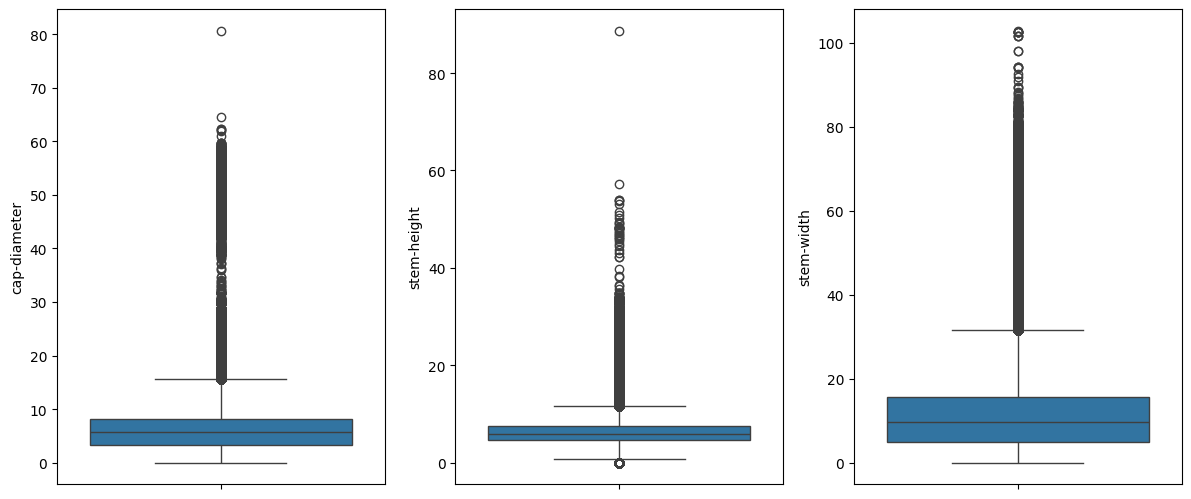

In [37]:
# Visualise Non-Object Columns as Boxplots
plt.figure(figsize=(16,10))
for i, col in enumerate(non_object_columns):
        plt.subplot(2,4,i + 1)
        sns.boxplot(y=col, data=preprocessed_train_df)
        #plt.ylabel('')

plt.tight_layout()

plt.show()

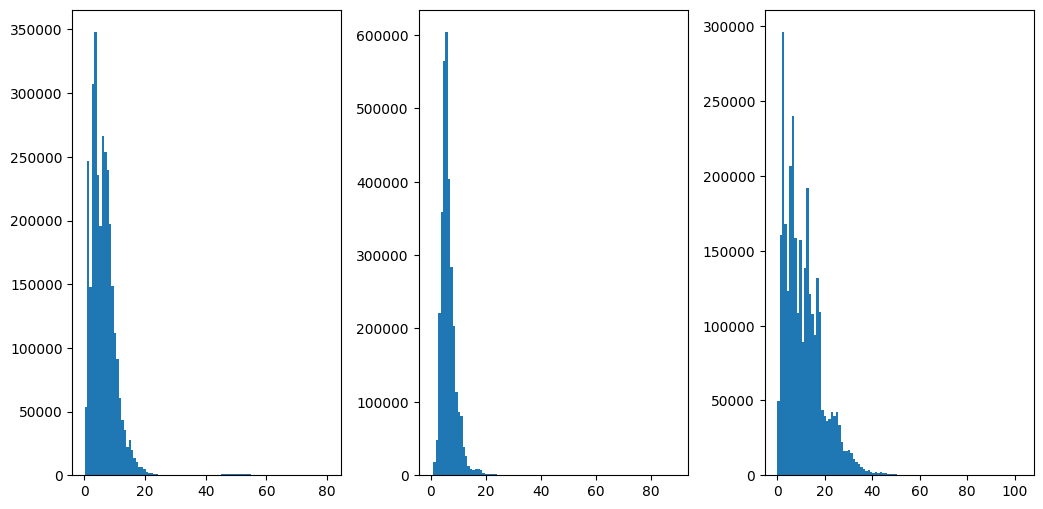

In [38]:
# Visualise Non-Object Columns as Histograms
plt.figure(figsize=(14,10))
for i, col in enumerate(non_object_columns):
        plt.subplot(2,4,i + 1)
        plt.hist(preprocessed_train_df[col], bins=100)
        #plt.ylabel('')

plt.tight_layout()
# Results clearly show that all 3 non-object columns are right-skewed, hence transformation is required
plt.show()

In [39]:
# Function to implement Interquartile-Range to identify outliers present (if any)
def IQR_Outliers (X, features):

    print('# of features: ', len(features))
    print('Features: ', features)

    indices = [x for x in X.index]
    #print(indices)
    print('Total number of samples: ', len(indices))
    
    out_indexlist = []
        
    for col in features:
        #Use nanpercentile instead of percentile if there are NAN values
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        print ('\nFeature: ', col)
        print ('Upper and Lower limits: ', upper, lower)
                
        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        print('Number of outliers: ', len(outliers))
        print('Outliers Index: ', outliers_index)
        print('Outliers: ', outliers)
        
        out_indexlist.extend(outliers_index)
        
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    out_indexlist.sort()
    print('\nTotal number of rows with outliers: ', len(out_indexlist))
    print('List of rows with outliers: ', out_indexlist)
    
    
IQR_Outliers(preprocessed_train_df, non_object_columns)

# of features:  3
Features:  ['cap-diameter', 'stem-height', 'stem-width']
Total number of samples:  3116945

Feature:  cap-diameter
Upper and Lower limits:  15.620000000000001 -4.0600000000000005
Number of outliers:  76124
Outliers Index:  [93, 153, 252, 342, 392, 423, 457, 486, 550, 626, 675, 693, 700, 727, 749, 767, 787, 904, 919, 964, 996, 1009, 1051, 1066, 1100, 1198, 1226, 1258, 1272, 1313, 1428, 1464, 1495, 1509, 1587, 1624, 1740, 1785, 1932, 1957, 2002, 2012, 2016, 2072, 2086, 2132, 2180, 2186, 2189, 2281, 2302, 2360, 2369, 2393, 2453, 2471, 2534, 2568, 2685, 2693, 2696, 2710, 2864, 2906, 2927, 2990, 2993, 3026, 3028, 3033, 3073, 3148, 3229, 3232, 3249, 3321, 3403, 3409, 3437, 3451, 3453, 3493, 3522, 3523, 3553, 3592, 3607, 3634, 3648, 3661, 3687, 3702, 3744, 3753, 3778, 3791, 3928, 4004, 4024, 4031, 4063, 4079, 4136, 4174, 4292, 4299, 4326, 4435, 4491, 4508, 4527, 4543, 4599, 4602, 4606, 4745, 4795, 4842, 4879, 5057, 5067, 5094, 5121, 5203, 5266, 5275, 5277, 5296, 5299, 5330, 

In [40]:
# Square Root function created to transform non-object columns
def sqrt_transformation (features, df): 
    for feature in features: 
        df[f"sqrt_{feature}"] = np.sqrt(df[feature])
        df = df.drop(columns=[f"{feature}"])
    return df 

In [70]:
# Cube Root Function created to transform non-object columns
def cube_root_transformation (features, df):
    for feature in features: 
        df[f"cbrt_{feature}"] = np.cbrt(df[feature])
        df = df.drop(columns=[f"{feature}"])
        return df

In [41]:
# Applying Sqrt transformation to non-object columns
Non_object_transformed_train_df = sqrt_transformation(non_object_columns, preprocessed_train_df)
transformed_non_object_columns = [col for col in Non_object_transformed_train_df.columns if Non_object_transformed_train_df[col].dtypes != 'object']

# Current Skewness for Non-Object columns after applying Sqrt transformation
Non_object_transformed_train_df[transformed_non_object_columns].skew() 

sqrt_cap-diameter    0.903853
sqrt_stem-height     0.868055
sqrt_stem-width      0.296952
dtype: float64

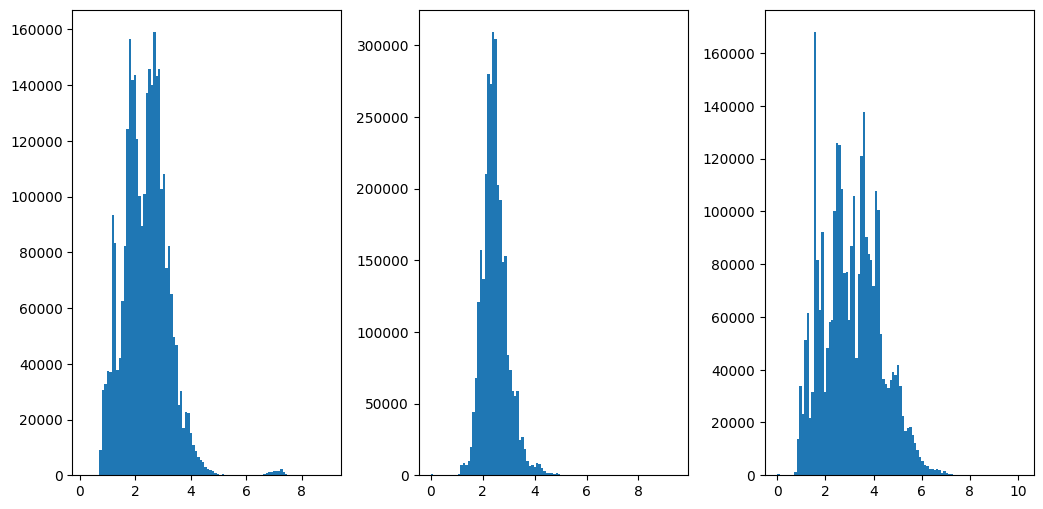

In [69]:
# Visualise Numerical Feature Columns as Histograms after Square Root Transformation has been applied
plt.figure(figsize=(14,10))
for i, col in enumerate(transformed_non_object_columns):
        plt.subplot(2,4,i + 1)
        plt.hist(Non_object_transformed_train_df[col], bins=100)
        #plt.ylabel('')

plt.tight_layout()

plt.show()

In [42]:
Non_object_transformed_train_df.isnull().sum() 

cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
sqrt_cap-diameter       0
sqrt_stem-height        0
sqrt_stem-width         0
dtype: int64

Data Preprocessing for Features which are of Object Data Type within Test DataFrame

In [43]:
# Filter the dataframe that contains wrong values within 'Does-bruise-or-bleed' column in Test_df
erroneous_values_df = preprocessed_test_df[((preprocessed_test_df['does-bruise-or-bleed'] != 'f') & (preprocessed_test_df['does-bruise-or-bleed'] != 't'))]

# Replace Categorical Feature 'does-bruise-or-bleed' with binary True or False values because this is a boolean
true_percentage = round(preprocessed_test_df[preprocessed_test_df['does-bruise-or-bleed'] == 't'].shape[0] / preprocessed_test_df[(preprocessed_test_df['does-bruise-or-bleed'] == 'f') | (preprocessed_test_df['does-bruise-or-bleed'] == 't')].shape[0] * 100, 3)

# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['t', 'f'], size=erroneous_values_df.shape[0], p=[true_percentage/100, 1 - true_percentage/100])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_test_df.loc[erroneous_values_df.index, 'does-bruise-or-bleed'] = random_choices

# Updated Value_Counts() to reflect binary true/false
print (preprocessed_test_df['does-bruise-or-bleed'].value_counts())
print (preprocessed_test_df['does-bruise-or-bleed'].isnull().sum()) 

does-bruise-or-bleed
f    1713728
t     364236
Name: count, dtype: int64
0


In [44]:
# Filter the dataframe that contains insignificant values within 'cap-surface' column in Test_df
erroneous_values_df = preprocessed_test_df[((preprocessed_test_df['cap-surface'] != 't') & (preprocessed_test_df['cap-surface'] != 's') & (preprocessed_test_df['cap-surface'] != 'y') & (preprocessed_test_df['cap-surface'] != 'h') & (preprocessed_test_df['cap-surface'] != 'g') & (preprocessed_test_df['cap-surface'] != 'd') &(preprocessed_test_df['cap-surface'] != 'k') & (preprocessed_test_df['cap-surface'] != 'e') & (preprocessed_test_df['cap-surface'] != 'i') & (preprocessed_test_df['cap-surface'] != 'w') & (preprocessed_test_df['cap-surface'] != 'l'))]
percentage_t = round(preprocessed_test_df[preprocessed_test_df['cap-surface'] == 't'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-surface'] == 't') | (preprocessed_test_df['cap-surface'] == 's') | (preprocessed_test_df['cap-surface'] == 'y') | (preprocessed_test_df['cap-surface'] == 'h') | (preprocessed_test_df['cap-surface'] == 'g') | (preprocessed_test_df['cap-surface'] == 'd') | (preprocessed_test_df['cap-surface'] == 'k') | (preprocessed_test_df['cap-surface'] == 'e') | (preprocessed_test_df['cap-surface'] == 'i') | (preprocessed_test_df['cap-surface'] == 'w') | (preprocessed_test_df['cap-surface'] == 'l')].shape[0] * 100, 3) 
percentage_s = round(preprocessed_test_df[preprocessed_test_df['cap-surface'] == 's'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-surface'] == 't') | (preprocessed_test_df['cap-surface'] == 's') | (preprocessed_test_df['cap-surface'] == 'y') | (preprocessed_test_df['cap-surface'] == 'h') | (preprocessed_test_df['cap-surface'] == 'g') | (preprocessed_test_df['cap-surface'] == 'd') | (preprocessed_test_df['cap-surface'] == 'k') | (preprocessed_test_df['cap-surface'] == 'e') | (preprocessed_test_df['cap-surface'] == 'i') | (preprocessed_test_df['cap-surface'] == 'w') | (preprocessed_test_df['cap-surface'] == 'l')].shape[0] * 100, 3) 
percentage_y = round(preprocessed_test_df[preprocessed_test_df['cap-surface'] == 'y'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-surface'] == 't') | (preprocessed_test_df['cap-surface'] == 's') | (preprocessed_test_df['cap-surface'] == 'y') | (preprocessed_test_df['cap-surface'] == 'h') | (preprocessed_test_df['cap-surface'] == 'g') | (preprocessed_test_df['cap-surface'] == 'd') | (preprocessed_test_df['cap-surface'] == 'k') | (preprocessed_test_df['cap-surface'] == 'e') | (preprocessed_test_df['cap-surface'] == 'i') | (preprocessed_test_df['cap-surface'] == 'w') | (preprocessed_test_df['cap-surface'] == 'l')].shape[0] * 100, 3)  
percentage_h = round(preprocessed_test_df[preprocessed_test_df['cap-surface'] == 'h'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-surface'] == 't') | (preprocessed_test_df['cap-surface'] == 's') | (preprocessed_test_df['cap-surface'] == 'y') | (preprocessed_test_df['cap-surface'] == 'h') | (preprocessed_test_df['cap-surface'] == 'g') | (preprocessed_test_df['cap-surface'] == 'd') | (preprocessed_test_df['cap-surface'] == 'k') | (preprocessed_test_df['cap-surface'] == 'e') | (preprocessed_test_df['cap-surface'] == 'i') | (preprocessed_test_df['cap-surface'] == 'w') | (preprocessed_test_df['cap-surface'] == 'l')].shape[0] * 100, 3) 
percentage_g = round(preprocessed_test_df[preprocessed_test_df['cap-surface'] == 'g'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-surface'] == 't') | (preprocessed_test_df['cap-surface'] == 's') | (preprocessed_test_df['cap-surface'] == 'y') | (preprocessed_test_df['cap-surface'] == 'h') | (preprocessed_test_df['cap-surface'] == 'g') | (preprocessed_test_df['cap-surface'] == 'd') | (preprocessed_test_df['cap-surface'] == 'k') | (preprocessed_test_df['cap-surface'] == 'e') | (preprocessed_test_df['cap-surface'] == 'i') | (preprocessed_test_df['cap-surface'] == 'w') | (preprocessed_test_df['cap-surface'] == 'l')].shape[0] * 100, 3) 
percentage_d = round(preprocessed_test_df[preprocessed_test_df['cap-surface'] == 'd'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-surface'] == 't') | (preprocessed_test_df['cap-surface'] == 's') | (preprocessed_test_df['cap-surface'] == 'y') | (preprocessed_test_df['cap-surface'] == 'h') | (preprocessed_test_df['cap-surface'] == 'g') | (preprocessed_test_df['cap-surface'] == 'd') | (preprocessed_test_df['cap-surface'] == 'k') | (preprocessed_test_df['cap-surface'] == 'e') | (preprocessed_test_df['cap-surface'] == 'i') | (preprocessed_test_df['cap-surface'] == 'w') | (preprocessed_test_df['cap-surface'] == 'l')].shape[0] * 100, 3) 
percentage_k = round(preprocessed_test_df[preprocessed_test_df['cap-surface'] == 'k'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-surface'] == 't') | (preprocessed_test_df['cap-surface'] == 's') | (preprocessed_test_df['cap-surface'] == 'y') | (preprocessed_test_df['cap-surface'] == 'h') | (preprocessed_test_df['cap-surface'] == 'g') | (preprocessed_test_df['cap-surface'] == 'd') | (preprocessed_test_df['cap-surface'] == 'k') | (preprocessed_test_df['cap-surface'] == 'e') | (preprocessed_test_df['cap-surface'] == 'i') | (preprocessed_test_df['cap-surface'] == 'w') | (preprocessed_test_df['cap-surface'] == 'l')].shape[0] * 100, 3)  
percentage_e = round(preprocessed_test_df[preprocessed_test_df['cap-surface'] == 'e'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-surface'] == 't') | (preprocessed_test_df['cap-surface'] == 's') | (preprocessed_test_df['cap-surface'] == 'y') | (preprocessed_test_df['cap-surface'] == 'h') | (preprocessed_test_df['cap-surface'] == 'g') | (preprocessed_test_df['cap-surface'] == 'd') | (preprocessed_test_df['cap-surface'] == 'k') | (preprocessed_test_df['cap-surface'] == 'e') | (preprocessed_test_df['cap-surface'] == 'i') | (preprocessed_test_df['cap-surface'] == 'w') | (preprocessed_test_df['cap-surface'] == 'l')].shape[0] * 100, 3) 
percentage_i = round(preprocessed_test_df[preprocessed_test_df['cap-surface'] == 'i'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-surface'] == 't') | (preprocessed_test_df['cap-surface'] == 's') | (preprocessed_test_df['cap-surface'] == 'y') | (preprocessed_test_df['cap-surface'] == 'h') | (preprocessed_test_df['cap-surface'] == 'g') | (preprocessed_test_df['cap-surface'] == 'd') | (preprocessed_test_df['cap-surface'] == 'k') | (preprocessed_test_df['cap-surface'] == 'e') | (preprocessed_test_df['cap-surface'] == 'i') | (preprocessed_test_df['cap-surface'] == 'w') | (preprocessed_test_df['cap-surface'] == 'l')].shape[0] * 100, 3)  
percentage_w = round(preprocessed_test_df[preprocessed_test_df['cap-surface'] == 'w'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-surface'] == 't') | (preprocessed_test_df['cap-surface'] == 's') | (preprocessed_test_df['cap-surface'] == 'y') | (preprocessed_test_df['cap-surface'] == 'h') | (preprocessed_test_df['cap-surface'] == 'g') | (preprocessed_test_df['cap-surface'] == 'd') | (preprocessed_test_df['cap-surface'] == 'k') | (preprocessed_test_df['cap-surface'] == 'e') | (preprocessed_test_df['cap-surface'] == 'i') | (preprocessed_test_df['cap-surface'] == 'w') | (preprocessed_test_df['cap-surface'] == 'l')].shape[0] * 100, 3) 
percentage_l = round(preprocessed_test_df[preprocessed_test_df['cap-surface'] == 'l'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-surface'] == 't') | (preprocessed_test_df['cap-surface'] == 's') | (preprocessed_test_df['cap-surface'] == 'y') | (preprocessed_test_df['cap-surface'] == 'h') | (preprocessed_test_df['cap-surface'] == 'g') | (preprocessed_test_df['cap-surface'] == 'd') | (preprocessed_test_df['cap-surface'] == 'k') | (preprocessed_test_df['cap-surface'] == 'e') | (preprocessed_test_df['cap-surface'] == 'i') | (preprocessed_test_df['cap-surface'] == 'w') | (preprocessed_test_df['cap-surface'] == 'l')].shape[0] * 100, 3) 

# print (percentage_t, percentage_s, percentage_y, percentage_h, percentage_g, percentage_d, percentage_k, percentage_e, percentage_i, percentage_w, percentage_l) 
# print (percentage_t + percentage_s + percentage_y + percentage_h + percentage_g + percentage_d + percentage_k + percentage_e + percentage_i + percentage_w + percentage_l)

# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['t', 's', 'y', 'h', 'g', 'd', 'k', 'e', 'i', 'w', 'l'], size=erroneous_values_df.shape[0], p=[percentage_t/100, percentage_s/100, percentage_y/100, percentage_h/100, 
                            percentage_g/100, percentage_d/100, percentage_k/100, percentage_e/100, percentage_i/100, percentage_w/100, (1-(percentage_t/100+percentage_s/100+percentage_y/100+percentage_h/100+ 
                            percentage_g/100+percentage_d/100+percentage_k/100+percentage_e/100+percentage_i/100+percentage_w/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_test_df.loc[erroneous_values_df.index, 'cap-surface'] = random_choices

# Updated Value_Counts() to reflect downsizing of values within cap-surface feature
print (preprocessed_test_df['cap-surface'].value_counts())
print (preprocessed_test_df['cap-surface'].isnull().sum())

cap-surface
t    391331
s    327631
y    278240
h    241577
g    224513
d    175405
k    109727
e    101747
i     96270
w     93162
l     38361
Name: count, dtype: int64
0


In [45]:
# Filter the dataframe that contains wrong values within 'cap-shape' column in Test_df
erroneous_values_df = preprocessed_test_df[((preprocessed_test_df['cap-shape'] != 'x') & (preprocessed_test_df['cap-shape'] != 'f') & (preprocessed_test_df['cap-shape'] != 's') & (preprocessed_test_df['cap-shape'] != 'b') & (preprocessed_test_df['cap-shape'] != 'o') & (preprocessed_test_df['cap-shape'] != 'p') & (preprocessed_test_df['cap-shape'] != 'c'))]

percentage_x = round(preprocessed_test_df[preprocessed_test_df['cap-shape'] == 'x'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-shape'] == 'x') | (preprocessed_test_df['cap-shape'] == 'f') | (preprocessed_test_df['cap-shape'] == 's') | (preprocessed_test_df['cap-shape'] == 'b') | (preprocessed_test_df['cap-shape'] == 'o') | (preprocessed_test_df['cap-shape'] == 'p') | (preprocessed_test_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_f = round(preprocessed_test_df[preprocessed_test_df['cap-shape'] == 'f'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-shape'] == 'x') | (preprocessed_test_df['cap-shape'] == 'f') | (preprocessed_test_df['cap-shape'] == 's') | (preprocessed_test_df['cap-shape'] == 'b') | (preprocessed_test_df['cap-shape'] == 'o') | (preprocessed_test_df['cap-shape'] == 'p') | (preprocessed_test_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_s = round(preprocessed_test_df[preprocessed_test_df['cap-shape'] == 's'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-shape'] == 'x') | (preprocessed_test_df['cap-shape'] == 'f') | (preprocessed_test_df['cap-shape'] == 's') | (preprocessed_test_df['cap-shape'] == 'b') | (preprocessed_test_df['cap-shape'] == 'o') | (preprocessed_test_df['cap-shape'] == 'p') | (preprocessed_test_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_b = round(preprocessed_test_df[preprocessed_test_df['cap-shape'] == 'b'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-shape'] == 'x') | (preprocessed_test_df['cap-shape'] == 'f') | (preprocessed_test_df['cap-shape'] == 's') | (preprocessed_test_df['cap-shape'] == 'b') | (preprocessed_test_df['cap-shape'] == 'o') | (preprocessed_test_df['cap-shape'] == 'p') | (preprocessed_test_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_o = round(preprocessed_test_df[preprocessed_test_df['cap-shape'] == 'o'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-shape'] == 'x') | (preprocessed_test_df['cap-shape'] == 'f') | (preprocessed_test_df['cap-shape'] == 's') | (preprocessed_test_df['cap-shape'] == 'b') | (preprocessed_test_df['cap-shape'] == 'o') | (preprocessed_test_df['cap-shape'] == 'p') | (preprocessed_test_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_p = round(preprocessed_test_df[preprocessed_test_df['cap-shape'] == 'p'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-shape'] == 'x') | (preprocessed_test_df['cap-shape'] == 'f') | (preprocessed_test_df['cap-shape'] == 's') | (preprocessed_test_df['cap-shape'] == 'b') | (preprocessed_test_df['cap-shape'] == 'o') | (preprocessed_test_df['cap-shape'] == 'p') | (preprocessed_test_df['cap-shape'] == 'c')].shape[0] * 100, 3)
percentage_c = round(preprocessed_test_df[preprocessed_test_df['cap-shape'] == 'c'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-shape'] == 'x') | (preprocessed_test_df['cap-shape'] == 'f') | (preprocessed_test_df['cap-shape'] == 's') | (preprocessed_test_df['cap-shape'] == 'b') | (preprocessed_test_df['cap-shape'] == 'o') | (preprocessed_test_df['cap-shape'] == 'p') | (preprocessed_test_df['cap-shape'] == 'c')].shape[0] * 100, 3)

# print (percentage_x+percentage_f+percentage_s+percentage_b+percentage_o+percentage_p+percentage_c)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['x', 'f', 's', 'b', 'o','p', 'c'], size=erroneous_values_df.shape[0], p=[percentage_x/100, percentage_f/100, percentage_s/100, percentage_b/100, percentage_o/100, percentage_p/100,
                                                (1 - (percentage_x/100+percentage_f/100+percentage_s/100+percentage_b/100+percentage_o/100+percentage_p/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_test_df.loc[erroneous_values_df.index, 'cap-shape'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_test_df['cap-shape'].value_counts())
print (preprocessed_test_df['cap-shape'].isnull().sum())


cap-shape
x    958107
f    452444
s    242740
b    211912
o     71996
p     71313
c     69452
Name: count, dtype: int64
0


In [46]:
# Filter the dataframe that contains wrong values within 'cap-color' column in Test_df
erroneous_values_df = preprocessed_test_df[((preprocessed_test_df['cap-color'] != 'n') & (preprocessed_test_df['cap-color'] != 'y') & (preprocessed_test_df['cap-color'] != 'w') & (preprocessed_test_df['cap-color'] != 'g') & (preprocessed_test_df['cap-color'] != 'e') & (preprocessed_test_df['cap-color'] != 'o') & (preprocessed_test_df['cap-color'] != 'p') & (preprocessed_test_df['cap-color'] != 'r') &(preprocessed_test_df['cap-color'] != 'u') & (preprocessed_test_df['cap-color'] != 'b') & (preprocessed_test_df['cap-color'] != 'k') & (preprocessed_test_df['cap-color'] != 'l'))]

percentage_n = round(preprocessed_test_df[preprocessed_test_df['cap-color'] == 'n'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-color'] == 'n') | (preprocessed_test_df['cap-color'] == 'y') | (preprocessed_test_df['cap-color'] == 'w') | (preprocessed_test_df['cap-color'] == 'g') | (preprocessed_test_df['cap-color'] == 'e') | (preprocessed_test_df['cap-color'] == 'o') | (preprocessed_test_df['cap-color'] == 'p') | (preprocessed_test_df['cap-color'] == 'r') | (preprocessed_test_df['cap-color'] == 'u') | (preprocessed_test_df['cap-color'] == 'b') | (preprocessed_test_df['cap-color'] == 'k') | (preprocessed_test_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_y = round(preprocessed_test_df[preprocessed_test_df['cap-color'] == 'y'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-color'] == 'n') | (preprocessed_test_df['cap-color'] == 'y') | (preprocessed_test_df['cap-color'] == 'w') | (preprocessed_test_df['cap-color'] == 'g') | (preprocessed_test_df['cap-color'] == 'e') | (preprocessed_test_df['cap-color'] == 'o') | (preprocessed_test_df['cap-color'] == 'p') | (preprocessed_test_df['cap-color'] == 'r') | (preprocessed_test_df['cap-color'] == 'u') | (preprocessed_test_df['cap-color'] == 'b') | (preprocessed_test_df['cap-color'] == 'k') | (preprocessed_test_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_w = round(preprocessed_test_df[preprocessed_test_df['cap-color'] == 'w'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-color'] == 'n') | (preprocessed_test_df['cap-color'] == 'y') | (preprocessed_test_df['cap-color'] == 'w') | (preprocessed_test_df['cap-color'] == 'g') | (preprocessed_test_df['cap-color'] == 'e') | (preprocessed_test_df['cap-color'] == 'o') | (preprocessed_test_df['cap-color'] == 'p') | (preprocessed_test_df['cap-color'] == 'r') | (preprocessed_test_df['cap-color'] == 'u') | (preprocessed_test_df['cap-color'] == 'b') | (preprocessed_test_df['cap-color'] == 'k') | (preprocessed_test_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_g = round(preprocessed_test_df[preprocessed_test_df['cap-color'] == 'g'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-color'] == 'n') | (preprocessed_test_df['cap-color'] == 'y') | (preprocessed_test_df['cap-color'] == 'w') | (preprocessed_test_df['cap-color'] == 'g') | (preprocessed_test_df['cap-color'] == 'e') | (preprocessed_test_df['cap-color'] == 'o') | (preprocessed_test_df['cap-color'] == 'p') | (preprocessed_test_df['cap-color'] == 'r') | (preprocessed_test_df['cap-color'] == 'u') | (preprocessed_test_df['cap-color'] == 'b') | (preprocessed_test_df['cap-color'] == 'k') | (preprocessed_test_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_e = round(preprocessed_test_df[preprocessed_test_df['cap-color'] == 'e'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-color'] == 'n') | (preprocessed_test_df['cap-color'] == 'y') | (preprocessed_test_df['cap-color'] == 'w') | (preprocessed_test_df['cap-color'] == 'g') | (preprocessed_test_df['cap-color'] == 'e') | (preprocessed_test_df['cap-color'] == 'o') | (preprocessed_test_df['cap-color'] == 'p') | (preprocessed_test_df['cap-color'] == 'r') | (preprocessed_test_df['cap-color'] == 'u') | (preprocessed_test_df['cap-color'] == 'b') | (preprocessed_test_df['cap-color'] == 'k') | (preprocessed_test_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_o = round(preprocessed_test_df[preprocessed_test_df['cap-color'] == 'o'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-color'] == 'n') | (preprocessed_test_df['cap-color'] == 'y') | (preprocessed_test_df['cap-color'] == 'w') | (preprocessed_test_df['cap-color'] == 'g') | (preprocessed_test_df['cap-color'] == 'e') | (preprocessed_test_df['cap-color'] == 'o') | (preprocessed_test_df['cap-color'] == 'p') | (preprocessed_test_df['cap-color'] == 'r') | (preprocessed_test_df['cap-color'] == 'u') | (preprocessed_test_df['cap-color'] == 'b') | (preprocessed_test_df['cap-color'] == 'k') | (preprocessed_test_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_p = round(preprocessed_test_df[preprocessed_test_df['cap-color'] == 'p'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-color'] == 'n') | (preprocessed_test_df['cap-color'] == 'y') | (preprocessed_test_df['cap-color'] == 'w') | (preprocessed_test_df['cap-color'] == 'g') | (preprocessed_test_df['cap-color'] == 'e') | (preprocessed_test_df['cap-color'] == 'o') | (preprocessed_test_df['cap-color'] == 'p') | (preprocessed_test_df['cap-color'] == 'r') | (preprocessed_test_df['cap-color'] == 'u') | (preprocessed_test_df['cap-color'] == 'b') | (preprocessed_test_df['cap-color'] == 'k') | (preprocessed_test_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_r = round(preprocessed_test_df[preprocessed_test_df['cap-color'] == 'r'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-color'] == 'n') | (preprocessed_test_df['cap-color'] == 'y') | (preprocessed_test_df['cap-color'] == 'w') | (preprocessed_test_df['cap-color'] == 'g') | (preprocessed_test_df['cap-color'] == 'e') | (preprocessed_test_df['cap-color'] == 'o') | (preprocessed_test_df['cap-color'] == 'p') | (preprocessed_test_df['cap-color'] == 'r') | (preprocessed_test_df['cap-color'] == 'u') | (preprocessed_test_df['cap-color'] == 'b') | (preprocessed_test_df['cap-color'] == 'k') | (preprocessed_test_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_u = round(preprocessed_test_df[preprocessed_test_df['cap-color'] == 'u'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-color'] == 'n') | (preprocessed_test_df['cap-color'] == 'y') | (preprocessed_test_df['cap-color'] == 'w') | (preprocessed_test_df['cap-color'] == 'g') | (preprocessed_test_df['cap-color'] == 'e') | (preprocessed_test_df['cap-color'] == 'o') | (preprocessed_test_df['cap-color'] == 'p') | (preprocessed_test_df['cap-color'] == 'r') | (preprocessed_test_df['cap-color'] == 'u') | (preprocessed_test_df['cap-color'] == 'b') | (preprocessed_test_df['cap-color'] == 'k') | (preprocessed_test_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_b = round(preprocessed_test_df[preprocessed_test_df['cap-color'] == 'b'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-color'] == 'n') | (preprocessed_test_df['cap-color'] == 'y') | (preprocessed_test_df['cap-color'] == 'w') | (preprocessed_test_df['cap-color'] == 'g') | (preprocessed_test_df['cap-color'] == 'e') | (preprocessed_test_df['cap-color'] == 'o') | (preprocessed_test_df['cap-color'] == 'p') | (preprocessed_test_df['cap-color'] == 'r') | (preprocessed_test_df['cap-color'] == 'u') | (preprocessed_test_df['cap-color'] == 'b') | (preprocessed_test_df['cap-color'] == 'k') | (preprocessed_test_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_k = round(preprocessed_test_df[preprocessed_test_df['cap-color'] == 'k'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-color'] == 'n') | (preprocessed_test_df['cap-color'] == 'y') | (preprocessed_test_df['cap-color'] == 'w') | (preprocessed_test_df['cap-color'] == 'g') | (preprocessed_test_df['cap-color'] == 'e') | (preprocessed_test_df['cap-color'] == 'o') | (preprocessed_test_df['cap-color'] == 'p') | (preprocessed_test_df['cap-color'] == 'r') | (preprocessed_test_df['cap-color'] == 'u') | (preprocessed_test_df['cap-color'] == 'b') | (preprocessed_test_df['cap-color'] == 'k') | (preprocessed_test_df['cap-color'] == 'l')].shape[0] * 100, 3)
percentage_l = round(preprocessed_test_df[preprocessed_test_df['cap-color'] == 'l'].shape[0] / preprocessed_test_df[(preprocessed_test_df['cap-color'] == 'n') | (preprocessed_test_df['cap-color'] == 'y') | (preprocessed_test_df['cap-color'] == 'w') | (preprocessed_test_df['cap-color'] == 'g') | (preprocessed_test_df['cap-color'] == 'e') | (preprocessed_test_df['cap-color'] == 'o') | (preprocessed_test_df['cap-color'] == 'p') | (preprocessed_test_df['cap-color'] == 'r') | (preprocessed_test_df['cap-color'] == 'u') | (preprocessed_test_df['cap-color'] == 'b') | (preprocessed_test_df['cap-color'] == 'k') | (preprocessed_test_df['cap-color'] == 'l')].shape[0] * 100, 3)

# print (percentage_n, percentage_y, percentage_w, percentage_g, percentage_e, percentage_o, percentage_p, percentage_r, percentage_u, percentage_b, percentage_k, percentage_l) 
# print (percentage_n + percentage_y + percentage_w + percentage_g + percentage_e + percentage_o + percentage_p + percentage_r + percentage_u + percentage_b + percentage_k + percentage_l)

# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['n', 'y', 'w', 'g', 'e', 'o','p', 'r', 'u', 'b', 'k', 'l'], size=erroneous_values_df.shape[0], p=[percentage_n/100, percentage_y/100, percentage_w/100, percentage_g/100, percentage_e/100, percentage_o/100, percentage_p/100, percentage_r/100, percentage_u/100, percentage_b/100, percentage_k/100,
                                (1 - (percentage_n/100 + percentage_y/100 + percentage_w/100 + percentage_g/100 + percentage_e/100 + percentage_o/100 + percentage_p/100 + percentage_r/100 + percentage_u/100 + percentage_b/100 + percentage_k/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_test_df.loc[erroneous_values_df.index, 'cap-color'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_test_df['cap-color'].value_counts())
print (preprocessed_test_df['cap-color'].isnull().sum())

cap-color
n    904425
y    259100
w    253880
g    140697
e    131547
o    119776
p     61200
r     51786
u     48873
b     40797
k     39621
l     26262
Name: count, dtype: int64
0


In [47]:
# Filter the dataframe that contains wrong values within 'gill-attachment' column in Test_df
erroneous_values_df = preprocessed_test_df[((preprocessed_test_df['gill-attachment'] != 'a') & (preprocessed_test_df['gill-attachment'] != 'd') & (preprocessed_test_df['gill-attachment'] != 'x') & (preprocessed_test_df['gill-attachment'] != 'e') & (preprocessed_test_df['gill-attachment'] != 's') & (preprocessed_test_df['gill-attachment'] != 'p') & (preprocessed_test_df['gill-attachment'] != 'f'))]

percentage_a = round(preprocessed_test_df[preprocessed_test_df['gill-attachment'] == 'a'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-attachment'] == 'a') | (preprocessed_test_df['gill-attachment'] == 'd') | (preprocessed_test_df['gill-attachment'] == 'x') | (preprocessed_test_df['gill-attachment'] == 'e') | (preprocessed_test_df['gill-attachment'] == 's') | (preprocessed_test_df['gill-attachment'] == 'p') | (preprocessed_test_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_d = round(preprocessed_test_df[preprocessed_test_df['gill-attachment'] == 'd'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-attachment'] == 'a') | (preprocessed_test_df['gill-attachment'] == 'd') | (preprocessed_test_df['gill-attachment'] == 'x') | (preprocessed_test_df['gill-attachment'] == 'e') | (preprocessed_test_df['gill-attachment'] == 's') | (preprocessed_test_df['gill-attachment'] == 'p') | (preprocessed_test_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_x = round(preprocessed_test_df[preprocessed_test_df['gill-attachment'] == 'x'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-attachment'] == 'a') | (preprocessed_test_df['gill-attachment'] == 'd') | (preprocessed_test_df['gill-attachment'] == 'x') | (preprocessed_test_df['gill-attachment'] == 'e') | (preprocessed_test_df['gill-attachment'] == 's') | (preprocessed_test_df['gill-attachment'] == 'p') | (preprocessed_test_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_e = round(preprocessed_test_df[preprocessed_test_df['gill-attachment'] == 'e'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-attachment'] == 'a') | (preprocessed_test_df['gill-attachment'] == 'd') | (preprocessed_test_df['gill-attachment'] == 'x') | (preprocessed_test_df['gill-attachment'] == 'e') | (preprocessed_test_df['gill-attachment'] == 's') | (preprocessed_test_df['gill-attachment'] == 'p') | (preprocessed_test_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_s = round(preprocessed_test_df[preprocessed_test_df['gill-attachment'] == 's'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-attachment'] == 'a') | (preprocessed_test_df['gill-attachment'] == 'd') | (preprocessed_test_df['gill-attachment'] == 'x') | (preprocessed_test_df['gill-attachment'] == 'e') | (preprocessed_test_df['gill-attachment'] == 's') | (preprocessed_test_df['gill-attachment'] == 'p') | (preprocessed_test_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_p = round(preprocessed_test_df[preprocessed_test_df['gill-attachment'] == 'p'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-attachment'] == 'a') | (preprocessed_test_df['gill-attachment'] == 'd') | (preprocessed_test_df['gill-attachment'] == 'x') | (preprocessed_test_df['gill-attachment'] == 'e') | (preprocessed_test_df['gill-attachment'] == 's') | (preprocessed_test_df['gill-attachment'] == 'p') | (preprocessed_test_df['gill-attachment'] == 'f')].shape[0] * 100, 3)
percentage_f = round(preprocessed_test_df[preprocessed_test_df['gill-attachment'] == 'f'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-attachment'] == 'a') | (preprocessed_test_df['gill-attachment'] == 'd') | (preprocessed_test_df['gill-attachment'] == 'x') | (preprocessed_test_df['gill-attachment'] == 'e') | (preprocessed_test_df['gill-attachment'] == 's') | (preprocessed_test_df['gill-attachment'] == 'p') | (preprocessed_test_df['gill-attachment'] == 'f')].shape[0] * 100, 3)

# print (percentage_a+percentage_d+percentage_x+percentage_e+percentage_s+percentage_p+percentage_f)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['a', 'd', 'x', 'e', 's','p', 'f'], size=erroneous_values_df.shape[0], p=[percentage_a/100, percentage_d/100, percentage_x/100, percentage_e/100, percentage_s/100, percentage_p/100,
                                                (1 - (percentage_a/100+percentage_d/100+percentage_x/100+percentage_e/100+percentage_s/100+percentage_p/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_test_df.loc[erroneous_values_df.index, 'gill-attachment'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_test_df['gill-attachment'].value_counts())
print (preprocessed_test_df['gill-attachment'].isnull().sum())

gill-attachment
a    518138
d    472578
x    289925
e    241709
s    235859
p    224001
f     95754
Name: count, dtype: int64
0


In [48]:
# Filter the dataframe that contains wrong values within 'gill-color' column in Test_df
erroneous_values_df = preprocessed_test_df[((preprocessed_test_df['gill-color'] != 'w') & (preprocessed_test_df['gill-color'] != 'n') & (preprocessed_test_df['gill-color'] != 'y') & (preprocessed_test_df['gill-color'] != 'p') & (preprocessed_test_df['gill-color'] != 'g') & (preprocessed_test_df['gill-color'] != 'o') & (preprocessed_test_df['gill-color'] != 'k') & (preprocessed_test_df['gill-color'] != 'f') & (preprocessed_test_df['gill-color'] != 'r') & (preprocessed_test_df['gill-color'] != 'e') & (preprocessed_test_df['gill-color'] != 'b') & (preprocessed_test_df['gill-color'] != 'u'))]

percentage_w = round(preprocessed_test_df[preprocessed_test_df['gill-color'] == 'w'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-color'] == 'w') | (preprocessed_test_df['gill-color'] == 'n') | (preprocessed_test_df['gill-color'] == 'y') | (preprocessed_test_df['gill-color'] == 'p') | (preprocessed_test_df['gill-color'] == 'g') | (preprocessed_test_df['gill-color'] == 'o') | (preprocessed_test_df['gill-color'] == 'k') | (preprocessed_test_df['gill-color'] == 'f') | (preprocessed_test_df['gill-color'] == 'r') | (preprocessed_test_df['gill-color'] == 'e') | (preprocessed_test_df['gill-color'] == 'b') | (preprocessed_test_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_n = round(preprocessed_test_df[preprocessed_test_df['gill-color'] == 'n'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-color'] == 'w') | (preprocessed_test_df['gill-color'] == 'n') | (preprocessed_test_df['gill-color'] == 'y') | (preprocessed_test_df['gill-color'] == 'p') | (preprocessed_test_df['gill-color'] == 'g') | (preprocessed_test_df['gill-color'] == 'o') | (preprocessed_test_df['gill-color'] == 'k') | (preprocessed_test_df['gill-color'] == 'f') | (preprocessed_test_df['gill-color'] == 'r') | (preprocessed_test_df['gill-color'] == 'e') | (preprocessed_test_df['gill-color'] == 'b') | (preprocessed_test_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_y = round(preprocessed_test_df[preprocessed_test_df['gill-color'] == 'y'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-color'] == 'w') | (preprocessed_test_df['gill-color'] == 'n') | (preprocessed_test_df['gill-color'] == 'y') | (preprocessed_test_df['gill-color'] == 'p') | (preprocessed_test_df['gill-color'] == 'g') | (preprocessed_test_df['gill-color'] == 'o') | (preprocessed_test_df['gill-color'] == 'k') | (preprocessed_test_df['gill-color'] == 'f') | (preprocessed_test_df['gill-color'] == 'r') | (preprocessed_test_df['gill-color'] == 'e') | (preprocessed_test_df['gill-color'] == 'b') | (preprocessed_test_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_p = round(preprocessed_test_df[preprocessed_test_df['gill-color'] == 'p'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-color'] == 'w') | (preprocessed_test_df['gill-color'] == 'n') | (preprocessed_test_df['gill-color'] == 'y') | (preprocessed_test_df['gill-color'] == 'p') | (preprocessed_test_df['gill-color'] == 'g') | (preprocessed_test_df['gill-color'] == 'o') | (preprocessed_test_df['gill-color'] == 'k') | (preprocessed_test_df['gill-color'] == 'f') | (preprocessed_test_df['gill-color'] == 'r') | (preprocessed_test_df['gill-color'] == 'e') | (preprocessed_test_df['gill-color'] == 'b') | (preprocessed_test_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_g = round(preprocessed_test_df[preprocessed_test_df['gill-color'] == 'g'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-color'] == 'w') | (preprocessed_test_df['gill-color'] == 'n') | (preprocessed_test_df['gill-color'] == 'y') | (preprocessed_test_df['gill-color'] == 'p') | (preprocessed_test_df['gill-color'] == 'g') | (preprocessed_test_df['gill-color'] == 'o') | (preprocessed_test_df['gill-color'] == 'k') | (preprocessed_test_df['gill-color'] == 'f') | (preprocessed_test_df['gill-color'] == 'r') | (preprocessed_test_df['gill-color'] == 'e') | (preprocessed_test_df['gill-color'] == 'b') | (preprocessed_test_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_o = round(preprocessed_test_df[preprocessed_test_df['gill-color'] == 'o'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-color'] == 'w') | (preprocessed_test_df['gill-color'] == 'n') | (preprocessed_test_df['gill-color'] == 'y') | (preprocessed_test_df['gill-color'] == 'p') | (preprocessed_test_df['gill-color'] == 'g') | (preprocessed_test_df['gill-color'] == 'o') | (preprocessed_test_df['gill-color'] == 'k') | (preprocessed_test_df['gill-color'] == 'f') | (preprocessed_test_df['gill-color'] == 'r') | (preprocessed_test_df['gill-color'] == 'e') | (preprocessed_test_df['gill-color'] == 'b') | (preprocessed_test_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_k = round(preprocessed_test_df[preprocessed_test_df['gill-color'] == 'k'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-color'] == 'w') | (preprocessed_test_df['gill-color'] == 'n') | (preprocessed_test_df['gill-color'] == 'y') | (preprocessed_test_df['gill-color'] == 'p') | (preprocessed_test_df['gill-color'] == 'g') | (preprocessed_test_df['gill-color'] == 'o') | (preprocessed_test_df['gill-color'] == 'k') | (preprocessed_test_df['gill-color'] == 'f') | (preprocessed_test_df['gill-color'] == 'r') | (preprocessed_test_df['gill-color'] == 'e') | (preprocessed_test_df['gill-color'] == 'b') | (preprocessed_test_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_f = round(preprocessed_test_df[preprocessed_test_df['gill-color'] == 'f'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-color'] == 'w') | (preprocessed_test_df['gill-color'] == 'n') | (preprocessed_test_df['gill-color'] == 'y') | (preprocessed_test_df['gill-color'] == 'p') | (preprocessed_test_df['gill-color'] == 'g') | (preprocessed_test_df['gill-color'] == 'o') | (preprocessed_test_df['gill-color'] == 'k') | (preprocessed_test_df['gill-color'] == 'f') | (preprocessed_test_df['gill-color'] == 'r') | (preprocessed_test_df['gill-color'] == 'e') | (preprocessed_test_df['gill-color'] == 'b') | (preprocessed_test_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_r = round(preprocessed_test_df[preprocessed_test_df['gill-color'] == 'r'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-color'] == 'w') | (preprocessed_test_df['gill-color'] == 'n') | (preprocessed_test_df['gill-color'] == 'y') | (preprocessed_test_df['gill-color'] == 'p') | (preprocessed_test_df['gill-color'] == 'g') | (preprocessed_test_df['gill-color'] == 'o') | (preprocessed_test_df['gill-color'] == 'k') | (preprocessed_test_df['gill-color'] == 'f') | (preprocessed_test_df['gill-color'] == 'r') | (preprocessed_test_df['gill-color'] == 'e') | (preprocessed_test_df['gill-color'] == 'b') | (preprocessed_test_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_e = round(preprocessed_test_df[preprocessed_test_df['gill-color'] == 'e'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-color'] == 'w') | (preprocessed_test_df['gill-color'] == 'n') | (preprocessed_test_df['gill-color'] == 'y') | (preprocessed_test_df['gill-color'] == 'p') | (preprocessed_test_df['gill-color'] == 'g') | (preprocessed_test_df['gill-color'] == 'o') | (preprocessed_test_df['gill-color'] == 'k') | (preprocessed_test_df['gill-color'] == 'f') | (preprocessed_test_df['gill-color'] == 'r') | (preprocessed_test_df['gill-color'] == 'e') | (preprocessed_test_df['gill-color'] == 'b') | (preprocessed_test_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_b = round(preprocessed_test_df[preprocessed_test_df['gill-color'] == 'b'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-color'] == 'w') | (preprocessed_test_df['gill-color'] == 'n') | (preprocessed_test_df['gill-color'] == 'y') | (preprocessed_test_df['gill-color'] == 'p') | (preprocessed_test_df['gill-color'] == 'g') | (preprocessed_test_df['gill-color'] == 'o') | (preprocessed_test_df['gill-color'] == 'k') | (preprocessed_test_df['gill-color'] == 'f') | (preprocessed_test_df['gill-color'] == 'r') | (preprocessed_test_df['gill-color'] == 'e') | (preprocessed_test_df['gill-color'] == 'b') | (preprocessed_test_df['gill-color'] == 'u')].shape[0] * 100, 3)
percentage_u = round(preprocessed_test_df[preprocessed_test_df['gill-color'] == 'u'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-color'] == 'w') | (preprocessed_test_df['gill-color'] == 'n') | (preprocessed_test_df['gill-color'] == 'y') | (preprocessed_test_df['gill-color'] == 'p') | (preprocessed_test_df['gill-color'] == 'g') | (preprocessed_test_df['gill-color'] == 'o') | (preprocessed_test_df['gill-color'] == 'k') | (preprocessed_test_df['gill-color'] == 'f') | (preprocessed_test_df['gill-color'] == 'r') | (preprocessed_test_df['gill-color'] == 'e') | (preprocessed_test_df['gill-color'] == 'b') | (preprocessed_test_df['gill-color'] == 'u')].shape[0] * 100, 3)

# print (percentage_w + percentage_n + percentage_y + percentage_p + percentage_g+ percentage_o + percentage_k + percentage_f + percentage_r + percentage_e + percentage_b + percentage_u)

# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['w', 'n', 'y', 'p', 'g', 'o','k', 'f', 'r', 'e', 'b', 'u'], size=erroneous_values_df.shape[0], p=[percentage_w/100, percentage_n/100, percentage_y/100, percentage_p/100, percentage_g/100, percentage_o/100, percentage_k/100, percentage_f/100, percentage_r/100, percentage_e/100, percentage_b/100,
                                (1 - (percentage_w/100 + percentage_n/100 + percentage_y/100 + percentage_p/100 + percentage_g/100 + percentage_o/100 + percentage_k/100 + percentage_f/100 + percentage_r/100 + percentage_e/100 + percentage_b/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_test_df.loc[erroneous_values_df.index, 'gill-color'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_test_df['gill-color'].value_counts())
print (preprocessed_test_df['gill-color'].isnull().sum())


gill-color
w    620871
n    362213
y    313989
p    229196
g    141543
o    105062
k     85374
f     79495
r     41509
e     37435
b     31188
u     30089
Name: count, dtype: int64
0


In [49]:
# Filter the dataframe that contains wrong values within 'gill-spacing' column in Test_df
erroneous_values_df = preprocessed_test_df[((preprocessed_test_df['gill-spacing'] != 'c') & (preprocessed_test_df['gill-spacing'] != 'd') & (preprocessed_test_df['gill-spacing'] != 'f'))]

percentage_c = round(preprocessed_test_df[preprocessed_test_df['gill-spacing'] == 'c'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-spacing'] == 'c') | (preprocessed_test_df['gill-spacing'] == 'd') | (preprocessed_test_df['gill-spacing'] == 'f')].shape[0] * 100, 3)
percentage_d = round(preprocessed_test_df[preprocessed_test_df['gill-spacing'] == 'd'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-spacing'] == 'c') | (preprocessed_test_df['gill-spacing'] == 'd') | (preprocessed_test_df['gill-spacing'] == 'f')].shape[0] * 100, 3)
percentage_f = round(preprocessed_test_df[preprocessed_test_df['gill-spacing'] == 'f'].shape[0] / preprocessed_test_df[(preprocessed_test_df['gill-spacing'] == 'c') | (preprocessed_test_df['gill-spacing'] == 'd') | (preprocessed_test_df['gill-spacing'] == 'f')].shape[0] * 100, 3)


# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['c', 'd', 'f'], size=erroneous_values_df.shape[0], p=[percentage_c/100, percentage_d/100, (1 - (percentage_c/100+percentage_d/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_test_df.loc[erroneous_values_df.index, 'gill-spacing'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_test_df['gill-spacing'].value_counts())
print (preprocessed_test_df['gill-spacing'].isnull().sum())

gill-spacing
c    1488015
d     457015
f     132934
Name: count, dtype: int64
0


In [50]:
# Filter the dataframe that contains wrong values within 'has-ring' column in Test_df
erroneous_values_df = preprocessed_test_df[((preprocessed_test_df['has-ring'] != 'f') & (preprocessed_test_df['has-ring'] != 't'))]

percentage_f = round(preprocessed_test_df[preprocessed_test_df['has-ring'] == 'f'].shape[0] / preprocessed_test_df[(preprocessed_test_df['has-ring'] == 'f') | (preprocessed_test_df['has-ring'] == 't')].shape[0] * 100, 3)
percentage_t = round(preprocessed_test_df[preprocessed_test_df['has-ring'] == 't'].shape[0] / preprocessed_test_df[(preprocessed_test_df['has-ring'] == 'f') | (preprocessed_test_df['has-ring'] == 't')].shape[0] * 100, 3)

# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['f', 't'], size=erroneous_values_df.shape[0], p=[percentage_f/100, (1 - (percentage_f/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_test_df.loc[erroneous_values_df.index, 'has-ring'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_test_df['has-ring'].value_counts())
print (preprocessed_test_df['has-ring'].isnull().sum())

has-ring
f    1578181
t     499783
Name: count, dtype: int64
0


In [51]:
# Filter the dataframe that contains wrong values within 'stem-color' column in Test_df
erroneous_values_df = preprocessed_test_df[((preprocessed_test_df['stem-color'] != 'w') & (preprocessed_test_df['stem-color'] != 'n') & (preprocessed_test_df['stem-color'] != 'y') & (preprocessed_test_df['stem-color'] != 'g') & (preprocessed_test_df['stem-color'] != 'o') & (preprocessed_test_df['stem-color'] != 'e') & (preprocessed_test_df['stem-color'] != 'u') & (preprocessed_test_df['stem-color'] != 'p') &(preprocessed_test_df['stem-color'] != 'k') & (preprocessed_test_df['stem-color'] != 'r') & (preprocessed_test_df['stem-color'] != 'l') & (preprocessed_test_df['stem-color'] != 'b') & (preprocessed_test_df['stem-color'] != 'f'))]

percentage_w = round(preprocessed_test_df[preprocessed_test_df['stem-color'] == 'w'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-color'] == 'w') | (preprocessed_test_df['stem-color'] == 'n') | (preprocessed_test_df['stem-color'] == 'y') | (preprocessed_test_df['stem-color'] == 'g') | (preprocessed_test_df['stem-color'] == 'o') | (preprocessed_test_df['stem-color'] == 'e') | (preprocessed_test_df['stem-color'] == 'u') | (preprocessed_test_df['stem-color'] == 'p') | (preprocessed_test_df['stem-color'] == 'k') | (preprocessed_test_df['stem-color'] == 'r') | (preprocessed_test_df['stem-color'] == 'l') | (preprocessed_test_df['stem-color'] == 'b') | (preprocessed_test_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_n = round(preprocessed_test_df[preprocessed_test_df['stem-color'] == 'n'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-color'] == 'w') | (preprocessed_test_df['stem-color'] == 'n') | (preprocessed_test_df['stem-color'] == 'y') | (preprocessed_test_df['stem-color'] == 'g') | (preprocessed_test_df['stem-color'] == 'o') | (preprocessed_test_df['stem-color'] == 'e') | (preprocessed_test_df['stem-color'] == 'u') | (preprocessed_test_df['stem-color'] == 'p') | (preprocessed_test_df['stem-color'] == 'k') | (preprocessed_test_df['stem-color'] == 'r') | (preprocessed_test_df['stem-color'] == 'l') | (preprocessed_test_df['stem-color'] == 'b') | (preprocessed_test_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_y = round(preprocessed_test_df[preprocessed_test_df['stem-color'] == 'y'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-color'] == 'w') | (preprocessed_test_df['stem-color'] == 'n') | (preprocessed_test_df['stem-color'] == 'y') | (preprocessed_test_df['stem-color'] == 'g') | (preprocessed_test_df['stem-color'] == 'o') | (preprocessed_test_df['stem-color'] == 'e') | (preprocessed_test_df['stem-color'] == 'u') | (preprocessed_test_df['stem-color'] == 'p') | (preprocessed_test_df['stem-color'] == 'k') | (preprocessed_test_df['stem-color'] == 'r') | (preprocessed_test_df['stem-color'] == 'l') | (preprocessed_test_df['stem-color'] == 'b') | (preprocessed_test_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_g = round(preprocessed_test_df[preprocessed_test_df['stem-color'] == 'g'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-color'] == 'w') | (preprocessed_test_df['stem-color'] == 'n') | (preprocessed_test_df['stem-color'] == 'y') | (preprocessed_test_df['stem-color'] == 'g') | (preprocessed_test_df['stem-color'] == 'o') | (preprocessed_test_df['stem-color'] == 'e') | (preprocessed_test_df['stem-color'] == 'u') | (preprocessed_test_df['stem-color'] == 'p') | (preprocessed_test_df['stem-color'] == 'k') | (preprocessed_test_df['stem-color'] == 'r') | (preprocessed_test_df['stem-color'] == 'l') | (preprocessed_test_df['stem-color'] == 'b') | (preprocessed_test_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_o = round(preprocessed_test_df[preprocessed_test_df['stem-color'] == 'o'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-color'] == 'w') | (preprocessed_test_df['stem-color'] == 'n') | (preprocessed_test_df['stem-color'] == 'y') | (preprocessed_test_df['stem-color'] == 'g') | (preprocessed_test_df['stem-color'] == 'o') | (preprocessed_test_df['stem-color'] == 'e') | (preprocessed_test_df['stem-color'] == 'u') | (preprocessed_test_df['stem-color'] == 'p') | (preprocessed_test_df['stem-color'] == 'k') | (preprocessed_test_df['stem-color'] == 'r') | (preprocessed_test_df['stem-color'] == 'l') | (preprocessed_test_df['stem-color'] == 'b') | (preprocessed_test_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_e = round(preprocessed_test_df[preprocessed_test_df['stem-color'] == 'e'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-color'] == 'w') | (preprocessed_test_df['stem-color'] == 'n') | (preprocessed_test_df['stem-color'] == 'y') | (preprocessed_test_df['stem-color'] == 'g') | (preprocessed_test_df['stem-color'] == 'o') | (preprocessed_test_df['stem-color'] == 'e') | (preprocessed_test_df['stem-color'] == 'u') | (preprocessed_test_df['stem-color'] == 'p') | (preprocessed_test_df['stem-color'] == 'k') | (preprocessed_test_df['stem-color'] == 'r') | (preprocessed_test_df['stem-color'] == 'l') | (preprocessed_test_df['stem-color'] == 'b') | (preprocessed_test_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_u = round(preprocessed_test_df[preprocessed_test_df['stem-color'] == 'u'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-color'] == 'w') | (preprocessed_test_df['stem-color'] == 'n') | (preprocessed_test_df['stem-color'] == 'y') | (preprocessed_test_df['stem-color'] == 'g') | (preprocessed_test_df['stem-color'] == 'o') | (preprocessed_test_df['stem-color'] == 'e') | (preprocessed_test_df['stem-color'] == 'u') | (preprocessed_test_df['stem-color'] == 'p') | (preprocessed_test_df['stem-color'] == 'k') | (preprocessed_test_df['stem-color'] == 'r') | (preprocessed_test_df['stem-color'] == 'l') | (preprocessed_test_df['stem-color'] == 'b') | (preprocessed_test_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_p = round(preprocessed_test_df[preprocessed_test_df['stem-color'] == 'p'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-color'] == 'w') | (preprocessed_test_df['stem-color'] == 'n') | (preprocessed_test_df['stem-color'] == 'y') | (preprocessed_test_df['stem-color'] == 'g') | (preprocessed_test_df['stem-color'] == 'o') | (preprocessed_test_df['stem-color'] == 'e') | (preprocessed_test_df['stem-color'] == 'u') | (preprocessed_test_df['stem-color'] == 'p') | (preprocessed_test_df['stem-color'] == 'k') | (preprocessed_test_df['stem-color'] == 'r') | (preprocessed_test_df['stem-color'] == 'l') | (preprocessed_test_df['stem-color'] == 'b') | (preprocessed_test_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_k = round(preprocessed_test_df[preprocessed_test_df['stem-color'] == 'k'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-color'] == 'w') | (preprocessed_test_df['stem-color'] == 'n') | (preprocessed_test_df['stem-color'] == 'y') | (preprocessed_test_df['stem-color'] == 'g') | (preprocessed_test_df['stem-color'] == 'o') | (preprocessed_test_df['stem-color'] == 'e') | (preprocessed_test_df['stem-color'] == 'u') | (preprocessed_test_df['stem-color'] == 'p') | (preprocessed_test_df['stem-color'] == 'k') | (preprocessed_test_df['stem-color'] == 'r') | (preprocessed_test_df['stem-color'] == 'l') | (preprocessed_test_df['stem-color'] == 'b') | (preprocessed_test_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_r = round(preprocessed_test_df[preprocessed_test_df['stem-color'] == 'r'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-color'] == 'w') | (preprocessed_test_df['stem-color'] == 'n') | (preprocessed_test_df['stem-color'] == 'y') | (preprocessed_test_df['stem-color'] == 'g') | (preprocessed_test_df['stem-color'] == 'o') | (preprocessed_test_df['stem-color'] == 'e') | (preprocessed_test_df['stem-color'] == 'u') | (preprocessed_test_df['stem-color'] == 'p') | (preprocessed_test_df['stem-color'] == 'k') | (preprocessed_test_df['stem-color'] == 'r') | (preprocessed_test_df['stem-color'] == 'l') | (preprocessed_test_df['stem-color'] == 'b') | (preprocessed_test_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_l = round(preprocessed_test_df[preprocessed_test_df['stem-color'] == 'l'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-color'] == 'w') | (preprocessed_test_df['stem-color'] == 'n') | (preprocessed_test_df['stem-color'] == 'y') | (preprocessed_test_df['stem-color'] == 'g') | (preprocessed_test_df['stem-color'] == 'o') | (preprocessed_test_df['stem-color'] == 'e') | (preprocessed_test_df['stem-color'] == 'u') | (preprocessed_test_df['stem-color'] == 'p') | (preprocessed_test_df['stem-color'] == 'k') | (preprocessed_test_df['stem-color'] == 'r') | (preprocessed_test_df['stem-color'] == 'l') | (preprocessed_test_df['stem-color'] == 'b') | (preprocessed_test_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_b = round(preprocessed_test_df[preprocessed_test_df['stem-color'] == 'b'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-color'] == 'w') | (preprocessed_test_df['stem-color'] == 'n') | (preprocessed_test_df['stem-color'] == 'y') | (preprocessed_test_df['stem-color'] == 'g') | (preprocessed_test_df['stem-color'] == 'o') | (preprocessed_test_df['stem-color'] == 'e') | (preprocessed_test_df['stem-color'] == 'u') | (preprocessed_test_df['stem-color'] == 'p') | (preprocessed_test_df['stem-color'] == 'k') | (preprocessed_test_df['stem-color'] == 'r') | (preprocessed_test_df['stem-color'] == 'l') | (preprocessed_test_df['stem-color'] == 'b') | (preprocessed_test_df['stem-color'] == 'f')].shape[0] * 100, 3)
percentage_f = round(preprocessed_test_df[preprocessed_test_df['stem-color'] == 'f'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-color'] == 'w') | (preprocessed_test_df['stem-color'] == 'n') | (preprocessed_test_df['stem-color'] == 'y') | (preprocessed_test_df['stem-color'] == 'g') | (preprocessed_test_df['stem-color'] == 'o') | (preprocessed_test_df['stem-color'] == 'e') | (preprocessed_test_df['stem-color'] == 'u') | (preprocessed_test_df['stem-color'] == 'p') | (preprocessed_test_df['stem-color'] == 'k') | (preprocessed_test_df['stem-color'] == 'r') | (preprocessed_test_df['stem-color'] == 'l') | (preprocessed_test_df['stem-color'] == 'b') | (preprocessed_test_df['stem-color'] == 'f')].shape[0] * 100, 3)

# print (percentage_w+percentage_n+percentage_y+percentage_g+percentage_o+percentage_e+percentage_u+percentage_p+percentage_k+percentage_r+percentage_l+percentage_b+percentage_f)

# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['w', 'n', 'y', 'g', 'o','e', 'u', 'p', 'k', 'r', 'l', 'b', 'f'], size=erroneous_values_df.shape[0], p=[percentage_w/100, percentage_n/100, percentage_y/100, percentage_g/100, percentage_o/100, percentage_e/100, percentage_u/100, percentage_p/100, percentage_k/100, percentage_r/100, percentage_l/100, percentage_b/100,
                                (1 - (percentage_w/100 + percentage_n/100 + percentage_y/100 + percentage_g/100 + percentage_o/100 + percentage_e/100 + percentage_u/100 + percentage_p/100 + percentage_k/100 + percentage_r/100 + percentage_l/100+percentage_b/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_test_df.loc[erroneous_values_df.index, 'stem-color'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_test_df['stem-color'].value_counts())
print (preprocessed_test_df['stem-color'].isnull().sum())


stem-color
w    797436
n    668230
y    250160
g     88216
o     75105
e     68810
u     44787
p     36357
k     22180
r     14911
l      6521
b      4896
f       355
Name: count, dtype: int64
0


In [52]:
# Filter the dataframe that contains wrong values within 'habitat' column in Test_df
erroneous_values_df = preprocessed_test_df[((preprocessed_test_df['habitat'] != 'd') & (preprocessed_test_df['habitat'] != 'g') & (preprocessed_test_df['habitat'] != 'l') & (preprocessed_test_df['habitat'] != 'm') & (preprocessed_test_df['habitat'] != 'h') & (preprocessed_test_df['habitat'] != 'w') & (preprocessed_test_df['habitat'] != 'p') & (preprocessed_test_df['habitat'] != 'u'))]

percentage_d = round(preprocessed_test_df[preprocessed_test_df['habitat'] == 'd'].shape[0] / preprocessed_test_df[(preprocessed_test_df['habitat'] == 'd') | (preprocessed_test_df['habitat'] == 'g') | (preprocessed_test_df['habitat'] == 'l') | (preprocessed_test_df['habitat'] == 'm') | (preprocessed_test_df['habitat'] == 'h') | (preprocessed_test_df['habitat'] == 'w') | (preprocessed_test_df['habitat'] == 'p') | (preprocessed_test_df['habitat'] == 'u')].shape[0] * 100, 3)
percentage_g = round(preprocessed_test_df[preprocessed_test_df['habitat'] == 'g'].shape[0] / preprocessed_test_df[(preprocessed_test_df['habitat'] == 'd') | (preprocessed_test_df['habitat'] == 'g') | (preprocessed_test_df['habitat'] == 'l') | (preprocessed_test_df['habitat'] == 'm') | (preprocessed_test_df['habitat'] == 'h') | (preprocessed_test_df['habitat'] == 'w') | (preprocessed_test_df['habitat'] == 'p') | (preprocessed_test_df['habitat'] == 'u')].shape[0] * 100, 3)
percentage_l = round(preprocessed_test_df[preprocessed_test_df['habitat'] == 'l'].shape[0] / preprocessed_test_df[(preprocessed_test_df['habitat'] == 'd') | (preprocessed_test_df['habitat'] == 'g') | (preprocessed_test_df['habitat'] == 'l') | (preprocessed_test_df['habitat'] == 'm') | (preprocessed_test_df['habitat'] == 'h') | (preprocessed_test_df['habitat'] == 'w') | (preprocessed_test_df['habitat'] == 'p') | (preprocessed_test_df['habitat'] == 'u')].shape[0] * 100, 3)
percentage_m = round(preprocessed_test_df[preprocessed_test_df['habitat'] == 'm'].shape[0] / preprocessed_test_df[(preprocessed_test_df['habitat'] == 'd') | (preprocessed_test_df['habitat'] == 'g') | (preprocessed_test_df['habitat'] == 'l') | (preprocessed_test_df['habitat'] == 'm') | (preprocessed_test_df['habitat'] == 'h') | (preprocessed_test_df['habitat'] == 'w') | (preprocessed_test_df['habitat'] == 'p') | (preprocessed_test_df['habitat'] == 'u')].shape[0] * 100, 3)
percentage_h = round(preprocessed_test_df[preprocessed_test_df['habitat'] == 'h'].shape[0] / preprocessed_test_df[(preprocessed_test_df['habitat'] == 'd') | (preprocessed_test_df['habitat'] == 'g') | (preprocessed_test_df['habitat'] == 'l') | (preprocessed_test_df['habitat'] == 'm') | (preprocessed_test_df['habitat'] == 'h') | (preprocessed_test_df['habitat'] == 'w') | (preprocessed_test_df['habitat'] == 'p') | (preprocessed_test_df['habitat'] == 'u')].shape[0] * 100, 3)
percentage_w = round(preprocessed_test_df[preprocessed_test_df['habitat'] == 'w'].shape[0] / preprocessed_test_df[(preprocessed_test_df['habitat'] == 'd') | (preprocessed_test_df['habitat'] == 'g') | (preprocessed_test_df['habitat'] == 'l') | (preprocessed_test_df['habitat'] == 'm') | (preprocessed_test_df['habitat'] == 'h') | (preprocessed_test_df['habitat'] == 'w') | (preprocessed_test_df['habitat'] == 'p') | (preprocessed_test_df['habitat'] == 'u')].shape[0] * 100, 3)
percentage_p = round(preprocessed_test_df[preprocessed_test_df['habitat'] == 'p'].shape[0] / preprocessed_test_df[(preprocessed_test_df['habitat'] == 'd') | (preprocessed_test_df['habitat'] == 'g') | (preprocessed_test_df['habitat'] == 'l') | (preprocessed_test_df['habitat'] == 'm') | (preprocessed_test_df['habitat'] == 'h') | (preprocessed_test_df['habitat'] == 'w') | (preprocessed_test_df['habitat'] == 'p') | (preprocessed_test_df['habitat'] == 'u')].shape[0] * 100, 3)
percentage_u = round(preprocessed_test_df[preprocessed_test_df['habitat'] == 'u'].shape[0] / preprocessed_test_df[(preprocessed_test_df['habitat'] == 'd') | (preprocessed_test_df['habitat'] == 'g') | (preprocessed_test_df['habitat'] == 'l') | (preprocessed_test_df['habitat'] == 'm') | (preprocessed_test_df['habitat'] == 'h') | (preprocessed_test_df['habitat'] == 'w') | (preprocessed_test_df['habitat'] == 'p') | (preprocessed_test_df['habitat'] == 'u')].shape[0] * 100, 3)

# print (percentage_d+percentage_g+percentage_l+percentage_m+percentage_h+percentage_w+percentage_p+percentage_u)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['d', 'g', 'l', 'm', 'h', 'w', 'p', 'u'], size=erroneous_values_df.shape[0], p=[percentage_d/100, percentage_g/100, percentage_l/100, percentage_m/100, percentage_h/100, percentage_w/100,
                                                percentage_p/100, (1-(percentage_d/100+percentage_g/100+percentage_l/100+percentage_m/100+percentage_h/100+percentage_w/100+percentage_p/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_test_df.loc[erroneous_values_df.index, 'habitat'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_test_df['habitat'].value_counts())
print (preprocessed_test_df['habitat'].isnull().sum())

habitat
d    1450635
g     304339
l     114481
m     101276
h      80042
w      12324
p      11432
u       3435
Name: count, dtype: int64
0


In [53]:
# Filter the dataframe that contains wrong values within 'ring-type' column in Test_df
erroneous_values_df = preprocessed_test_df[((preprocessed_test_df['ring-type'] != 'f') & (preprocessed_test_df['ring-type'] != 'e') & (preprocessed_test_df['ring-type'] != 'z') & (preprocessed_test_df['ring-type'] != 'l') & (preprocessed_test_df['ring-type'] != 'r') & (preprocessed_test_df['ring-type'] != 'p') & (preprocessed_test_df['ring-type'] != 'g') & (preprocessed_test_df['ring-type'] != 'm'))]

percentage_f = round(preprocessed_test_df[preprocessed_test_df['ring-type'] == 'f'].shape[0] / preprocessed_test_df[(preprocessed_test_df['ring-type'] == 'f') | (preprocessed_test_df['ring-type'] == 'e') | (preprocessed_test_df['ring-type'] == 'z') | (preprocessed_test_df['ring-type'] == 'l') | (preprocessed_test_df['ring-type'] == 'r') | (preprocessed_test_df['ring-type'] == 'p') | (preprocessed_test_df['ring-type'] == 'g') | (preprocessed_test_df['ring-type'] == 'm')].shape[0] * 100, 3)
percentage_e = round(preprocessed_test_df[preprocessed_test_df['ring-type'] == 'e'].shape[0] / preprocessed_test_df[(preprocessed_test_df['ring-type'] == 'f') | (preprocessed_test_df['ring-type'] == 'e') | (preprocessed_test_df['ring-type'] == 'z') | (preprocessed_test_df['ring-type'] == 'l') | (preprocessed_test_df['ring-type'] == 'r') | (preprocessed_test_df['ring-type'] == 'p') | (preprocessed_test_df['ring-type'] == 'g') | (preprocessed_test_df['ring-type'] == 'm')].shape[0] * 100, 3)
percentage_z = round(preprocessed_test_df[preprocessed_test_df['ring-type'] == 'z'].shape[0] / preprocessed_test_df[(preprocessed_test_df['ring-type'] == 'f') | (preprocessed_test_df['ring-type'] == 'e') | (preprocessed_test_df['ring-type'] == 'z') | (preprocessed_test_df['ring-type'] == 'l') | (preprocessed_test_df['ring-type'] == 'r') | (preprocessed_test_df['ring-type'] == 'p') | (preprocessed_test_df['ring-type'] == 'g') | (preprocessed_test_df['ring-type'] == 'm')].shape[0] * 100, 3)
percentage_l = round(preprocessed_test_df[preprocessed_test_df['ring-type'] == 'l'].shape[0] / preprocessed_test_df[(preprocessed_test_df['ring-type'] == 'f') | (preprocessed_test_df['ring-type'] == 'e') | (preprocessed_test_df['ring-type'] == 'z') | (preprocessed_test_df['ring-type'] == 'l') | (preprocessed_test_df['ring-type'] == 'r') | (preprocessed_test_df['ring-type'] == 'p') | (preprocessed_test_df['ring-type'] == 'g') | (preprocessed_test_df['ring-type'] == 'm')].shape[0] * 100, 3)
percentage_p = round(preprocessed_test_df[preprocessed_test_df['ring-type'] == 'p'].shape[0] / preprocessed_test_df[(preprocessed_test_df['ring-type'] == 'f') | (preprocessed_test_df['ring-type'] == 'e') | (preprocessed_test_df['ring-type'] == 'z') | (preprocessed_test_df['ring-type'] == 'l') | (preprocessed_test_df['ring-type'] == 'r') | (preprocessed_test_df['ring-type'] == 'p') | (preprocessed_test_df['ring-type'] == 'g') | (preprocessed_test_df['ring-type'] == 'm')].shape[0] * 100, 3)
percentage_r = round(preprocessed_test_df[preprocessed_test_df['ring-type'] == 'r'].shape[0] / preprocessed_test_df[(preprocessed_test_df['ring-type'] == 'f') | (preprocessed_test_df['ring-type'] == 'e') | (preprocessed_test_df['ring-type'] == 'z') | (preprocessed_test_df['ring-type'] == 'l') | (preprocessed_test_df['ring-type'] == 'r') | (preprocessed_test_df['ring-type'] == 'p') | (preprocessed_test_df['ring-type'] == 'g') | (preprocessed_test_df['ring-type'] == 'm')].shape[0] * 100, 3)
percentage_g = round(preprocessed_test_df[preprocessed_test_df['ring-type'] == 'g'].shape[0] / preprocessed_test_df[(preprocessed_test_df['ring-type'] == 'f') | (preprocessed_test_df['ring-type'] == 'e') | (preprocessed_test_df['ring-type'] == 'z') | (preprocessed_test_df['ring-type'] == 'l') | (preprocessed_test_df['ring-type'] == 'r') | (preprocessed_test_df['ring-type'] == 'p') | (preprocessed_test_df['ring-type'] == 'g') | (preprocessed_test_df['ring-type'] == 'm')].shape[0] * 100, 3)
percentage_m = round(preprocessed_test_df[preprocessed_test_df['ring-type'] == 'm'].shape[0] / preprocessed_test_df[(preprocessed_test_df['ring-type'] == 'f') | (preprocessed_test_df['ring-type'] == 'e') | (preprocessed_test_df['ring-type'] == 'z') | (preprocessed_test_df['ring-type'] == 'l') | (preprocessed_test_df['ring-type'] == 'r') | (preprocessed_test_df['ring-type'] == 'p') | (preprocessed_test_df['ring-type'] == 'g') | (preprocessed_test_df['ring-type'] == 'm')].shape[0] * 100, 3)

# print(percentage_f+percentage_e+percentage_z+percentage_l+percentage_r+percentage_p+percentage_g+percentage_m)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['f', 'e', 'z', 'l', 'r', 'p', 'g', 'm'], size=erroneous_values_df.shape[0], p=[percentage_f/100, percentage_e/100, percentage_z/100, percentage_l/100, percentage_r/100, percentage_p/100,
                                                percentage_g/100, percentage_m/100])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_test_df.loc[erroneous_values_df.index, 'ring-type'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_test_df['ring-type'].value_counts())
print (preprocessed_test_df['ring-type'].isnull().sum())


ring-type
f    1721944
e      83764
z      79187
l      50959
p      47700
r      47379
g      44240
m       2791
Name: count, dtype: int64
0


In [54]:
# Filter the dataframe that contains wrong values within 'veil-color' column in Test_df
erroneous_values_df = preprocessed_test_df[((preprocessed_test_df['veil-color'] != 'w') & (preprocessed_test_df['veil-color'] != 'y') & (preprocessed_test_df['veil-color'] != 'n') & (preprocessed_test_df['veil-color'] != 'u') & (preprocessed_test_df['veil-color'] != 'k') & (preprocessed_test_df['veil-color'] != 'e'))]

percentage_w = round(preprocessed_test_df[preprocessed_test_df['veil-color'] == 'w'].shape[0] / preprocessed_test_df[(preprocessed_test_df['veil-color'] == 'w') | (preprocessed_test_df['veil-color'] == 'y') | (preprocessed_test_df['veil-color'] == 'n') | (preprocessed_test_df['veil-color'] == 'u') | (preprocessed_test_df['veil-color'] == 'k') | (preprocessed_test_df['veil-color'] == 'e')].shape[0] * 100, 3)
percentage_y = round(preprocessed_test_df[preprocessed_test_df['veil-color'] == 'y'].shape[0] / preprocessed_test_df[(preprocessed_test_df['veil-color'] == 'w') | (preprocessed_test_df['veil-color'] == 'y') | (preprocessed_test_df['veil-color'] == 'n') | (preprocessed_test_df['veil-color'] == 'u') | (preprocessed_test_df['veil-color'] == 'k') | (preprocessed_test_df['veil-color'] == 'e')].shape[0] * 100, 3)
percentage_n = round(preprocessed_test_df[preprocessed_test_df['veil-color'] == 'n'].shape[0] / preprocessed_test_df[(preprocessed_test_df['veil-color'] == 'w') | (preprocessed_test_df['veil-color'] == 'y') | (preprocessed_test_df['veil-color'] == 'n') | (preprocessed_test_df['veil-color'] == 'u') | (preprocessed_test_df['veil-color'] == 'k') | (preprocessed_test_df['veil-color'] == 'e')].shape[0] * 100, 3)
percentage_u = round(preprocessed_test_df[preprocessed_test_df['veil-color'] == 'u'].shape[0] / preprocessed_test_df[(preprocessed_test_df['veil-color'] == 'w') | (preprocessed_test_df['veil-color'] == 'y') | (preprocessed_test_df['veil-color'] == 'n') | (preprocessed_test_df['veil-color'] == 'u') | (preprocessed_test_df['veil-color'] == 'k') | (preprocessed_test_df['veil-color'] == 'e')].shape[0] * 100, 3)
percentage_k = round(preprocessed_test_df[preprocessed_test_df['veil-color'] == 'k'].shape[0] / preprocessed_test_df[(preprocessed_test_df['veil-color'] == 'w') | (preprocessed_test_df['veil-color'] == 'y') | (preprocessed_test_df['veil-color'] == 'n') | (preprocessed_test_df['veil-color'] == 'u') | (preprocessed_test_df['veil-color'] == 'k') | (preprocessed_test_df['veil-color'] == 'e')].shape[0] * 100, 3)
percentage_e = round(preprocessed_test_df[preprocessed_test_df['veil-color'] == 'e'].shape[0] / preprocessed_test_df[(preprocessed_test_df['veil-color'] == 'w') | (preprocessed_test_df['veil-color'] == 'y') | (preprocessed_test_df['veil-color'] == 'n') | (preprocessed_test_df['veil-color'] == 'u') | (preprocessed_test_df['veil-color'] == 'k') | (preprocessed_test_df['veil-color'] == 'e')].shape[0] * 100, 3)

# print (percentage_w+percentage_y+percentage_n+percentage_u+percentage_k+percentage_e)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['w', 'y', 'n', 'u', 'k', 'e'], size=erroneous_values_df.shape[0], p=[percentage_w/100, percentage_y/100, percentage_n/100, percentage_u/100, percentage_k/100, percentage_e/100
                                        ])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_test_df.loc[erroneous_values_df.index, 'veil-color'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_test_df['veil-color'].value_counts())
print (preprocessed_test_df['veil-color'].isnull().sum())

veil-color
w    1538978
y     171686
n     166919
u      77634
k      72055
e      50692
Name: count, dtype: int64
0


In [55]:
# Filter the dataframe that contains wrong values within 'stem-root' column in Test_df
erroneous_values_df = preprocessed_test_df[((preprocessed_test_df['stem-root'] != 'b') & (preprocessed_test_df['stem-root'] != 's') & (preprocessed_test_df['stem-root'] != 'r') & (preprocessed_test_df['stem-root'] != 'c') & (preprocessed_test_df['stem-root'] != 'f'))]

percentage_b = round(preprocessed_test_df[preprocessed_test_df['stem-root'] == 'b'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-root'] == 'b') | (preprocessed_test_df['stem-root'] == 's') | (preprocessed_test_df['stem-root'] == 'r') | (preprocessed_test_df['stem-root'] == 'c') | (preprocessed_test_df['stem-root'] == 'f')].shape[0] * 100, 3)
percentage_s = round(preprocessed_test_df[preprocessed_test_df['stem-root'] == 's'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-root'] == 'b') | (preprocessed_test_df['stem-root'] == 's') | (preprocessed_test_df['stem-root'] == 'r') | (preprocessed_test_df['stem-root'] == 'c') | (preprocessed_test_df['stem-root'] == 'f')].shape[0] * 100, 3)
percentage_r = round(preprocessed_test_df[preprocessed_test_df['stem-root'] == 'r'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-root'] == 'b') | (preprocessed_test_df['stem-root'] == 's') | (preprocessed_test_df['stem-root'] == 'r') | (preprocessed_test_df['stem-root'] == 'c') | (preprocessed_test_df['stem-root'] == 'f')].shape[0] * 100, 3)
percentage_c = round(preprocessed_test_df[preprocessed_test_df['stem-root'] == 'c'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-root'] == 'b') | (preprocessed_test_df['stem-root'] == 's') | (preprocessed_test_df['stem-root'] == 'r') | (preprocessed_test_df['stem-root'] == 'c') | (preprocessed_test_df['stem-root'] == 'f')].shape[0] * 100, 3)
percentage_f = round(preprocessed_test_df[preprocessed_test_df['stem-root'] == 'f'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-root'] == 'b') | (preprocessed_test_df['stem-root'] == 's') | (preprocessed_test_df['stem-root'] == 'r') | (preprocessed_test_df['stem-root'] == 'c') | (preprocessed_test_df['stem-root'] == 'f')].shape[0] * 100, 3)

# print (percentage_b+percentage_s+percentage_r+percentage_c+percentage_f)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['b', 's', 'r', 'c', 'f'], size=erroneous_values_df.shape[0], p=[percentage_b/100, percentage_s/100, percentage_r/100, percentage_c/100,
                                                        (1-(percentage_b/100+percentage_s/100+percentage_r/100+percentage_c/100))
                                        ])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_test_df.loc[erroneous_values_df.index, 'stem-root'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_test_df['stem-root'].value_counts())
print (preprocessed_test_df['stem-root'].isnull().sum())


stem-root
b    957357
s    678412
r    273870
c    165117
f      3208
Name: count, dtype: int64
0


In [56]:
# Filter the dataframe that contains unusual/missing values within 'stem-surface' column in Test_df
erroneous_values_df = preprocessed_test_df[((preprocessed_test_df['stem-surface'] != 's') & (preprocessed_test_df['stem-surface'] != 'y') & (preprocessed_test_df['stem-surface'] != 'i') & (preprocessed_test_df['stem-surface'] != 't') & (preprocessed_test_df['stem-surface'] != 'g') & (preprocessed_test_df['stem-surface'] != 'k') & (preprocessed_test_df['stem-surface'] != 'h') & (preprocessed_test_df['stem-surface'] != 'f'))]

percentage_s = round(preprocessed_test_df[preprocessed_test_df['stem-surface'] == 's'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-surface'] == 's') | (preprocessed_test_df['stem-surface'] == 'y') | (preprocessed_test_df['stem-surface'] == 'i') | (preprocessed_test_df['stem-surface'] == 't') | (preprocessed_test_df['stem-surface'] == 'g') | (preprocessed_test_df['stem-surface'] == 'k') | (preprocessed_test_df['stem-surface'] == 'h') | (preprocessed_test_df['stem-surface'] == 'f')].shape[0] * 100, 3)
percentage_y = round(preprocessed_test_df[preprocessed_test_df['stem-surface'] == 'y'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-surface'] == 's') | (preprocessed_test_df['stem-surface'] == 'y') | (preprocessed_test_df['stem-surface'] == 'i') | (preprocessed_test_df['stem-surface'] == 't') | (preprocessed_test_df['stem-surface'] == 'g') | (preprocessed_test_df['stem-surface'] == 'k') | (preprocessed_test_df['stem-surface'] == 'h') | (preprocessed_test_df['stem-surface'] == 'f')].shape[0] * 100, 3)
percentage_i = round(preprocessed_test_df[preprocessed_test_df['stem-surface'] == 'i'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-surface'] == 's') | (preprocessed_test_df['stem-surface'] == 'y') | (preprocessed_test_df['stem-surface'] == 'i') | (preprocessed_test_df['stem-surface'] == 't') | (preprocessed_test_df['stem-surface'] == 'g') | (preprocessed_test_df['stem-surface'] == 'k') | (preprocessed_test_df['stem-surface'] == 'h') | (preprocessed_test_df['stem-surface'] == 'f')].shape[0] * 100, 3)
percentage_t = round(preprocessed_test_df[preprocessed_test_df['stem-surface'] == 't'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-surface'] == 's') | (preprocessed_test_df['stem-surface'] == 'y') | (preprocessed_test_df['stem-surface'] == 'i') | (preprocessed_test_df['stem-surface'] == 't') | (preprocessed_test_df['stem-surface'] == 'g') | (preprocessed_test_df['stem-surface'] == 'k') | (preprocessed_test_df['stem-surface'] == 'h') | (preprocessed_test_df['stem-surface'] == 'f')].shape[0] * 100, 3)
percentage_g = round(preprocessed_test_df[preprocessed_test_df['stem-surface'] == 'g'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-surface'] == 's') | (preprocessed_test_df['stem-surface'] == 'y') | (preprocessed_test_df['stem-surface'] == 'i') | (preprocessed_test_df['stem-surface'] == 't') | (preprocessed_test_df['stem-surface'] == 'g') | (preprocessed_test_df['stem-surface'] == 'k') | (preprocessed_test_df['stem-surface'] == 'h') | (preprocessed_test_df['stem-surface'] == 'f')].shape[0] * 100, 3)
percentage_k = round(preprocessed_test_df[preprocessed_test_df['stem-surface'] == 'k'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-surface'] == 's') | (preprocessed_test_df['stem-surface'] == 'y') | (preprocessed_test_df['stem-surface'] == 'i') | (preprocessed_test_df['stem-surface'] == 't') | (preprocessed_test_df['stem-surface'] == 'g') | (preprocessed_test_df['stem-surface'] == 'k') | (preprocessed_test_df['stem-surface'] == 'h') | (preprocessed_test_df['stem-surface'] == 'f')].shape[0] * 100, 3)
percentage_h = round(preprocessed_test_df[preprocessed_test_df['stem-surface'] == 'h'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-surface'] == 's') | (preprocessed_test_df['stem-surface'] == 'y') | (preprocessed_test_df['stem-surface'] == 'i') | (preprocessed_test_df['stem-surface'] == 't') | (preprocessed_test_df['stem-surface'] == 'g') | (preprocessed_test_df['stem-surface'] == 'k') | (preprocessed_test_df['stem-surface'] == 'h') | (preprocessed_test_df['stem-surface'] == 'f')].shape[0] * 100, 3)
percentage_f = round(preprocessed_test_df[preprocessed_test_df['stem-surface'] == 'f'].shape[0] / preprocessed_test_df[(preprocessed_test_df['stem-surface'] == 's') | (preprocessed_test_df['stem-surface'] == 'y') | (preprocessed_test_df['stem-surface'] == 'i') | (preprocessed_test_df['stem-surface'] == 't') | (preprocessed_test_df['stem-surface'] == 'g') | (preprocessed_test_df['stem-surface'] == 'k') | (preprocessed_test_df['stem-surface'] == 'h') | (preprocessed_test_df['stem-surface'] == 'f')].shape[0] * 100, 3)

# print(percentage_s+percentage_y+percentage_i+percentage_t+percentage_g+percentage_k+percentage_h+percentage_f)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['s', 'y', 'i', 't', 'g', 'k', 'h', 'f'], size=erroneous_values_df.shape[0], p=[percentage_s/100, percentage_y/100, percentage_i/100, percentage_t/100, percentage_g/100, percentage_k/100,
                                                percentage_h/100, (1-(percentage_s/100+percentage_y/100+percentage_i/100+percentage_t/100+percentage_g/100+percentage_k/100+percentage_h/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_test_df.loc[erroneous_values_df.index, 'stem-surface'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_test_df['stem-surface'].value_counts())
print (preprocessed_test_df['stem-surface'].isnull().sum())

stem-surface
s    600684
y    465238
i    410354
t    271487
g    142232
k    135230
h     51872
f       867
Name: count, dtype: int64
0


In [57]:
# Filter the dataframe that contains unusual/missing values within 'veil-type' column in Test_df
erroneous_values_df = preprocessed_test_df[((preprocessed_test_df['veil-type'] != 'u'))]

percentage_u = round(preprocessed_test_df[preprocessed_test_df['veil-type'] == 'u'].shape[0] / preprocessed_test_df[(preprocessed_test_df['veil-type'] == 'u')].shape[0] * 100, 3)

# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['u'], size=erroneous_values_df.shape[0], p=[percentage_u/100])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_test_df.loc[erroneous_values_df.index, 'veil-type'] = random_choices

# Updated Value_Counts() to downsize unique values and whether there are still any missing values
print (preprocessed_test_df['veil-type'].value_counts())
print (preprocessed_test_df['veil-type'].isnull().sum())


veil-type
u    2077964
Name: count, dtype: int64
0


In [58]:
# Filter the dataframe that contains unusual/missing values within 'spore-print-color' column in Test_df
erroneous_values_df = preprocessed_test_df[((preprocessed_test_df['spore-print-color'] != 'k') & (preprocessed_test_df['spore-print-color'] != 'p') & (preprocessed_test_df['spore-print-color'] != 'w') & (preprocessed_test_df['spore-print-color'] != 'n') & (preprocessed_test_df['spore-print-color'] != 'r') & (preprocessed_test_df['spore-print-color'] != 'u') & (preprocessed_test_df['spore-print-color'] != 'g'))]

percentage_k = round(preprocessed_test_df[preprocessed_test_df['spore-print-color'] == 'k'].shape[0] / preprocessed_test_df[(preprocessed_test_df['spore-print-color'] == 'k') | (preprocessed_test_df['spore-print-color'] == 'p') | (preprocessed_test_df['spore-print-color'] == 'w') | (preprocessed_test_df['spore-print-color'] == 'n') | (preprocessed_test_df['spore-print-color'] == 'r') | (preprocessed_test_df['spore-print-color'] == 'u') | (preprocessed_test_df['spore-print-color'] == 'g')].shape[0] * 100, 3)
percentage_p = round(preprocessed_test_df[preprocessed_test_df['spore-print-color'] == 'p'].shape[0] / preprocessed_test_df[(preprocessed_test_df['spore-print-color'] == 'k') | (preprocessed_test_df['spore-print-color'] == 'p') | (preprocessed_test_df['spore-print-color'] == 'w') | (preprocessed_test_df['spore-print-color'] == 'n') | (preprocessed_test_df['spore-print-color'] == 'r') | (preprocessed_test_df['spore-print-color'] == 'u') | (preprocessed_test_df['spore-print-color'] == 'g')].shape[0] * 100, 3)
percentage_w = round(preprocessed_test_df[preprocessed_test_df['spore-print-color'] == 'w'].shape[0] / preprocessed_test_df[(preprocessed_test_df['spore-print-color'] == 'k') | (preprocessed_test_df['spore-print-color'] == 'p') | (preprocessed_test_df['spore-print-color'] == 'w') | (preprocessed_test_df['spore-print-color'] == 'n') | (preprocessed_test_df['spore-print-color'] == 'r') | (preprocessed_test_df['spore-print-color'] == 'u') | (preprocessed_test_df['spore-print-color'] == 'g')].shape[0] * 100, 3)
percentage_n = round(preprocessed_test_df[preprocessed_test_df['spore-print-color'] == 'n'].shape[0] / preprocessed_test_df[(preprocessed_test_df['spore-print-color'] == 'k') | (preprocessed_test_df['spore-print-color'] == 'p') | (preprocessed_test_df['spore-print-color'] == 'w') | (preprocessed_test_df['spore-print-color'] == 'n') | (preprocessed_test_df['spore-print-color'] == 'r') | (preprocessed_test_df['spore-print-color'] == 'u') | (preprocessed_test_df['spore-print-color'] == 'g')].shape[0] * 100, 3)
percentage_r = round(preprocessed_test_df[preprocessed_test_df['spore-print-color'] == 'r'].shape[0] / preprocessed_test_df[(preprocessed_test_df['spore-print-color'] == 'k') | (preprocessed_test_df['spore-print-color'] == 'p') | (preprocessed_test_df['spore-print-color'] == 'w') | (preprocessed_test_df['spore-print-color'] == 'n') | (preprocessed_test_df['spore-print-color'] == 'r') | (preprocessed_test_df['spore-print-color'] == 'u') | (preprocessed_test_df['spore-print-color'] == 'g')].shape[0] * 100, 3)
percentage_u = round(preprocessed_test_df[preprocessed_test_df['spore-print-color'] == 'u'].shape[0] / preprocessed_test_df[(preprocessed_test_df['spore-print-color'] == 'k') | (preprocessed_test_df['spore-print-color'] == 'p') | (preprocessed_test_df['spore-print-color'] == 'w') | (preprocessed_test_df['spore-print-color'] == 'n') | (preprocessed_test_df['spore-print-color'] == 'r') | (preprocessed_test_df['spore-print-color'] == 'u') | (preprocessed_test_df['spore-print-color'] == 'g')].shape[0] * 100, 3)
percentage_g = round(preprocessed_test_df[preprocessed_test_df['spore-print-color'] == 'g'].shape[0] / preprocessed_test_df[(preprocessed_test_df['spore-print-color'] == 'k') | (preprocessed_test_df['spore-print-color'] == 'p') | (preprocessed_test_df['spore-print-color'] == 'w') | (preprocessed_test_df['spore-print-color'] == 'n') | (preprocessed_test_df['spore-print-color'] == 'r') | (preprocessed_test_df['spore-print-color'] == 'u') | (preprocessed_test_df['spore-print-color'] == 'g')].shape[0] * 100, 3)

# print (percentage_k+percentage_p+percentage_w+percentage_n+percentage_r+percentage_u+percentage_g)
# Generate random choices based on the calculated true_percentage
random_choices = np.random.choice(['k', 'p', 'w', 'n', 'r', 'u', 'g'], size=erroneous_values_df.shape[0], p=[percentage_k/100, percentage_p/100, percentage_w/100, percentage_n/100, percentage_r/100, percentage_u/100,
                                                (1-(percentage_k/100+percentage_p/100+percentage_w/100+percentage_n/100+percentage_r/100+percentage_u/100))])

# Assign these random choices to the appropriate rows in the dataframe
preprocessed_test_df.loc[erroneous_values_df.index, 'spore-print-color'] = random_choices

# Updated Value_Counts() to downsize unique values and check whether there are still any missing values
print (preprocessed_test_df['spore-print-color'].value_counts())
print (preprocessed_test_df['spore-print-color'].isnull().sum())

spore-print-color
k    835435
p    529575
w    392107
n    176011
r     61646
u     56336
g     26854
Name: count, dtype: int64
0


In [59]:
preprocessed_test_df['season'].value_counts()

season
a    1029085
u     768267
w     185975
s      94637
Name: count, dtype: int64

Data Preprocessing for Numerical Features within Test DataFrame

In [60]:
# Retrieve the feature columns which are of non-object datatype in Test DataFrame
numerical_feature_columns = [col for col in preprocessed_test_df.columns if not preprocessed_test_df[col].dtypes == 'object']

# Fill Missing Values (7) for cap-diameter via median of cap-diameter values
preprocessed_test_df['cap-diameter'] = preprocessed_test_df['cap-diameter'].fillna(value=preprocessed_test_df['cap-diameter'].median())

# Fill Missing Value (1) for stem-height via median of stem-height values
preprocessed_test_df['stem-height'] = preprocessed_test_df['stem-height'].fillna(value=preprocessed_test_df['stem-height'].median())

preprocessed_test_df[numerical_feature_columns].isnull().sum()

cap-diameter    0
stem-height     0
stem-width      0
dtype: int64

In [61]:
preprocessed_test_df[numerical_feature_columns].describe() 

cap-diameter   stem-height    stem-width
count  2.077964e+06  2.077964e+06  2.077964e+06
mean   6.306190e+00  6.346509e+00  1.114837e+01
std    4.685455e+00  2.698977e+00  8.100181e+00
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    3.310000e+00  4.670000e+00  4.970000e+00
50%    5.740000e+00  5.880000e+00  9.640000e+00
75%    8.230000e+00  7.410000e+00  1.562000e+01
max    6.070000e+02  5.729000e+01  1.029100e+02

In [62]:
preprocessed_test_df[numerical_feature_columns].skew() 

cap-diameter    4.957170
stem-height     1.921952
stem-width      1.249341
dtype: float64

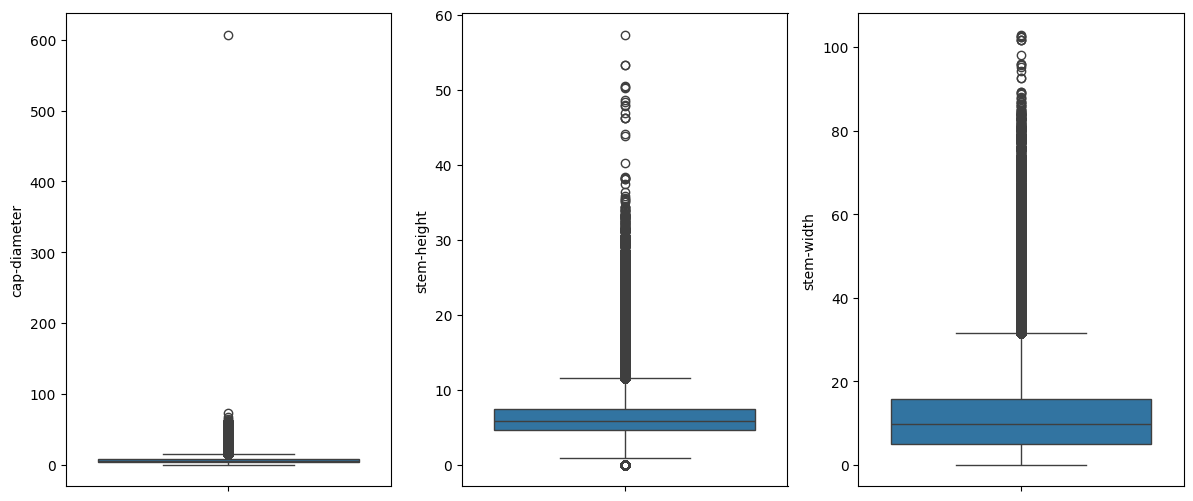

In [63]:
# Visualise Non-Object Columns as Boxplots
plt.figure(figsize=(16,10))
for i, col in enumerate(numerical_feature_columns):
        plt.subplot(2,4,i + 1)
        sns.boxplot(y=col, data=preprocessed_test_df)
        #plt.ylabel('')

plt.tight_layout()

plt.show()

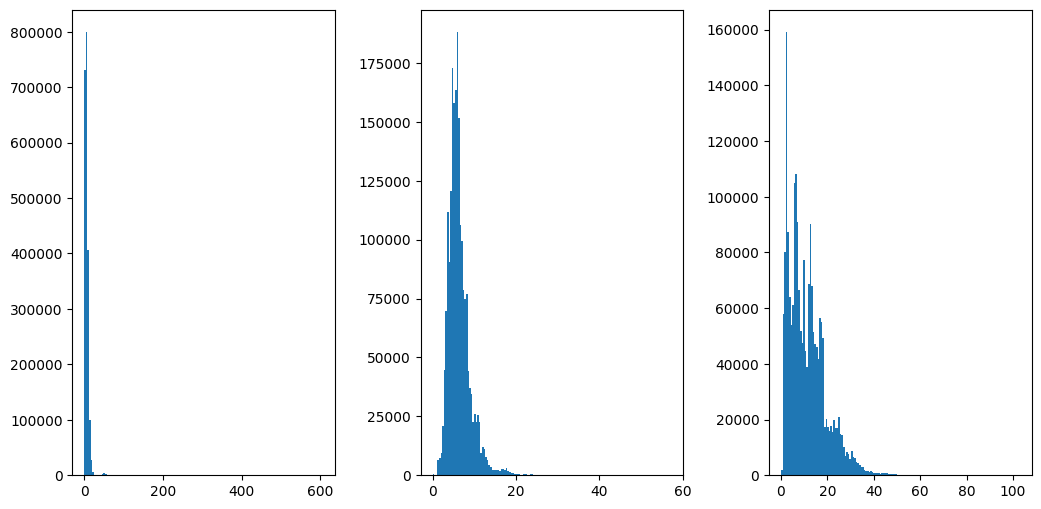

In [64]:
# Visualise Non-Object Columns as Histograms
plt.figure(figsize=(14,10))
for i, col in enumerate(numerical_feature_columns):
        plt.subplot(2,4,i + 1)
        plt.hist(preprocessed_test_df[col], bins=150)
        #plt.ylabel('')

plt.tight_layout()
# Results clearly show that all 3 non-object columns are right-skewed, hence transformation is required
plt.show()

In [65]:
IQR_Outliers(preprocessed_test_df, numerical_feature_columns)

# of features:  3
Features:  ['cap-diameter', 'stem-height', 'stem-width']
Total number of samples:  2077964

Feature:  cap-diameter
Upper and Lower limits:  15.61 -4.07
Number of outliers:  51122
Outliers Index:  [57, 112, 139, 151, 169, 201, 238, 252, 271, 275, 368, 660, 669, 705, 706, 730, 753, 759, 789, 854, 914, 1056, 1107, 1109, 1122, 1133, 1241, 1267, 1317, 1350, 1366, 1408, 1466, 1474, 1490, 1521, 1554, 1573, 1613, 1686, 1692, 1724, 1731, 1775, 1784, 1790, 1794, 1811, 1856, 1873, 1950, 2016, 2075, 2118, 2151, 2292, 2297, 2453, 2498, 2506, 2552, 2577, 2583, 2677, 2745, 2767, 2773, 2783, 2892, 2929, 2946, 2978, 2979, 3036, 3077, 3121, 3127, 3186, 3205, 3323, 3419, 3422, 3425, 3471, 3492, 3572, 3588, 3615, 3728, 3859, 3867, 3891, 3894, 3905, 3923, 4060, 4119, 4206, 4233, 4328, 4334, 4348, 4354, 4358, 4394, 4419, 4484, 4503, 4570, 4583, 4591, 4592, 4600, 4738, 4766, 4786, 4788, 4804, 4827, 4832, 4841, 4870, 4899, 4906, 4910, 4928, 4931, 5058, 5147, 5157, 5263, 5268, 5276, 5374, 558

In [66]:
# Applying square root transformation to numerical columns in Test_df
numerical_transformed_test_df = sqrt_transformation(numerical_feature_columns, preprocessed_test_df)
transformed_numerical_test_columns = [col for col in numerical_transformed_test_df.columns if numerical_transformed_test_df[col].dtypes != 'object']

# Current skewness for Non-Object columns after applying square root transformation
numerical_transformed_test_df[transformed_numerical_test_columns].skew() 

sqrt_cap-diameter    0.921530
sqrt_stem-height     0.873198
sqrt_stem-width      0.300236
dtype: float64

In [67]:
numerical_transformed_test_df.isnull().sum()

cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
sqrt_cap-diameter       0
sqrt_stem-height        0
sqrt_stem-width         0
dtype: int64